In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)

In [2]:
dataset = pd.read_csv("prosperLoanData.csv")

In [3]:
dataset.shape

(113937, 81)

In [4]:
dataset.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [5]:
# Checking for duplicates

dataset.duplicated().any()

np.False_

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
# Dataset statistics

dataset.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
count             84853.000000  84853.000000              113937.000000   
mean                  4.072243      5.950067                   2.774209   
std                   1.673227      2.376501                   3.996797   
min                   1.000000      1.000000                   0.000000   
25%                   3.000000      4.000000                   1.000000   
50%                   4.000000      6.000000                   1.000000   
75%                   5.000000      8.000000                   3.000000   
max                   7.000000     11.000000                  20.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             106312.000000          113346.000000          113346.000000   
mean                  96.071582             685.567731             704.567731   
std                   94.480605              66.458275              66.458275   
min                    0.000000               0.000000              19.000000   
25%                   26.000000             660.000000             679.000000   
50%                   67.000000             680.000000             699.000000   
75%                  137.000000             720.000000             739.000000   
max                  755.000000             880.000000             899.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count       106333.000000    106333.000000               113240.000000   
mean            10.317192         9.260164                   26.754539   
std              5.457866         5.022644                   13.637871   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   17.000000   
50%             10.000000         9.000000                   25.000000   
75%             13.000000        12.000000                   35.000000   
max             59.000000        54.000000                  136.000000   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
count           113937.00000                113937.000000   
mean                 6.96979                   398.292161   
std                  4.63097                   447.159711   
min                  0.00000                     0.000000   
25%                  4.00000                   114.000000   
50%                  6.00000                   271.000000   
75%                  9.00000                   525.000000   
max                 51.00000                 14985.000000   

       InquiriesLast6Months  Tot

# List of tasks.

1. Handling missing values.
	1.1 Removing features that has more than 80% missing values.
	1.2 Handling missing values in categorical features.
	1.3 Handling missing values in numerical features. Check if these numerical features has outliers, if so then 	    replace null values by median. Otherwise, replace null values by mean.

2. Converting LoanStatus (dependent variable) from multiclass to binary class (Defaulted: 1 and Non-Defaulted: 0).

3. Perform EDA.
	3.1 EDA on numerical features.
	3.2 EDA on categorical features.
	3.3 EDA on discrete numerical features.

4. Features Transformation.

5. Identifying correlation between features and dropping highly correlated features.

6. Handling dateTime features.
	6.1 Handling missing values in dateTime features.
	6.2 Fetch year, month and day from each dateTime feature.

7. Feature Generation and analysing those features.

8. Performing Encoding and Feature scaling.

9. Performing Feature Reduction.
	9.1 Feature reduction using PCA.
	9.2 Feature selection using Mutual Information.

Missing values

In [8]:
dataset.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [9]:
# Displaying all the features that has missing values.

null_columns = dataset.columns[dataset.isnull().any()]
print(null_columns)

Index(['CreditGrade', 'ClosedDate', 'BorrowerAPR', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'GroupKey',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOne

In [10]:
print(len(null_columns))

43


43 columns contains null values.

In [11]:
# Percentage of missing values present.

features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

CreditGrade 0.7459  % missing values
ClosedDate 0.5165  % missing values
BorrowerAPR 0.0002  % missing values
EstimatedEffectiveYield 0.2553  % missing values
EstimatedLoss 0.2553  % missing values
EstimatedReturn 0.2553  % missing values
ProsperRating (numeric) 0.2553  % missing values
ProsperRating (Alpha) 0.2553  % missing values
ProsperScore 0.2553  % missing values
BorrowerState 0.0484  % missing values
Occupation 0.0315  % missing values
EmploymentStatus 0.0198  % missing values
EmploymentStatusDuration 0.0669  % missing values
GroupKey 0.8829  % missing values
CreditScoreRangeLower 0.0052  % missing values
CreditScoreRangeUpper 0.0052  % missing values
FirstRecordedCreditLine 0.0061  % missing values
CurrentCreditLines 0.0667  % missing values
OpenCreditLines 0.0667  % missing values
TotalCreditLinespast7years 0.0061  % missing values
InquiriesLast6Months 0.0061  % missing values
TotalInquiries 0.0102  % missing values
CurrentDelinquencies 0.0061  % missing values
AmountDelinque

Removing the features that has more than 80% null values.

In [12]:
# Calculate the percentage of missing values for each column
null_percentage = dataset.isnull().mean() * 100

# Filter columns that have less than 80% missing values
data = dataset.loc[:, null_percentage < 80]

In [13]:
data.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup               DateCreditPulled  CreditScoreRangeLower  \
0              True  2007-08-26 18:41:46.780000000                  640.0   
1             False            2014-02-27 08:28:14                  680.0   
2              True  2007-01-02 14:09:10.060000000                  480.0   
3             False            2012-10-22 11:02:32                  800.0   
4             False            2013-09-14 18:38:44                  680.0   

   CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  \
0                  659.0     2001-10-11 00:00:00                 5.0   
1                  699.0     1996-03-18 00:00:00                14.0   
2                  499.0     2002-07-27 00:00:00                 NaN   
3                  819.0     1983-02-28 00:00:00                 5.0   
4                  699.0     2004-02-20 00:00:00                19.0   

   OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
0              4.0                        12.0                      1   
1             14.0                        29.0                     13   
2              NaN                         3.0                      0   
3              5.0                        29.0                      7   
4             19.0                        49.0                      6   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                         24.

In [14]:
data.shape

(113937, 71)

Displaying the percentage of missing values.

In [15]:
features_with_na = [features for features in data.columns if data[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

CreditGrade 0.7459  % missing values
ClosedDate 0.5165  % missing values
BorrowerAPR 0.0002  % missing values
EstimatedEffectiveYield 0.2553  % missing values
EstimatedLoss 0.2553  % missing values
EstimatedReturn 0.2553  % missing values
ProsperRating (numeric) 0.2553  % missing values
ProsperRating (Alpha) 0.2553  % missing values
ProsperScore 0.2553  % missing values
BorrowerState 0.0484  % missing values
Occupation 0.0315  % missing values
EmploymentStatus 0.0198  % missing values
EmploymentStatusDuration 0.0669  % missing values
CreditScoreRangeLower 0.0052  % missing values
CreditScoreRangeUpper 0.0052  % missing values
FirstRecordedCreditLine 0.0061  % missing values
CurrentCreditLines 0.0667  % missing values
OpenCreditLines 0.0667  % missing values
TotalCreditLinespast7years 0.0061  % missing values
InquiriesLast6Months 0.0061  % missing values
TotalInquiries 0.0102  % missing values
CurrentDelinquencies 0.0061  % missing values
AmountDelinquent 0.0669  % missing values
Delinq

# Handling missing values in categorical variables.

Replacing all the missing values in the categorical features with new label called 'Missing'.

In [16]:
# Get all the categorical features from the missing features (features_with_na).

cat_features_nan = [feature for feature in features_with_na if data[feature].dtypes=='object']

print(cat_features_nan)

['CreditGrade', 'ClosedDate', 'ProsperRating (Alpha)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'FirstRecordedCreditLine']


In [17]:
## Replace missing values with a new label
def replace_cat_feature(data, cat_features_nan):
    data_new = data.copy()
    data_new[cat_features_nan] = data_new[cat_features_nan].fillna('Missing')
    return data_new

In [18]:
data = replace_cat_feature(data, cat_features_nan)

data[cat_features_nan].isnull().sum()

CreditGrade                0
ClosedDate                 0
ProsperRating (Alpha)      0
BorrowerState              0
Occupation                 0
EmploymentStatus           0
FirstRecordedCreditLine    0
dtype: int64

# Handling missing values in Numerical features.

In [19]:
# Get all the numerical features from the missing features (features_with_na).

num_features_nan = [feature for feature in features_with_na if data[feature].dtypes != 'object']

print(num_features_nan)

['BorrowerAPR', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperScore', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio']


In [20]:
for feature in num_features_nan:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

BorrowerAPR 0.0002  % missing values
EstimatedEffectiveYield 0.2553  % missing values
EstimatedLoss 0.2553  % missing values
EstimatedReturn 0.2553  % missing values
ProsperRating (numeric) 0.2553  % missing values
ProsperScore 0.2553  % missing values
EmploymentStatusDuration 0.0669  % missing values
CreditScoreRangeLower 0.0052  % missing values
CreditScoreRangeUpper 0.0052  % missing values
CurrentCreditLines 0.0667  % missing values
OpenCreditLines 0.0667  % missing values
TotalCreditLinespast7years 0.0061  % missing values
InquiriesLast6Months 0.0061  % missing values
TotalInquiries 0.0102  % missing values
CurrentDelinquencies 0.0061  % missing values
AmountDelinquent 0.0669  % missing values
DelinquenciesLast7Years 0.0087  % missing values
PublicRecordsLast10Years 0.0061  % missing values
PublicRecordsLast12Months 0.0667  % missing values
RevolvingCreditBalance 0.0667  % missing values
BankcardUtilization 0.0667  % missing values
AvailableBankcardCredit 0.0662  % missing values


Finding out if the above numerical features containing missing values has outliers.

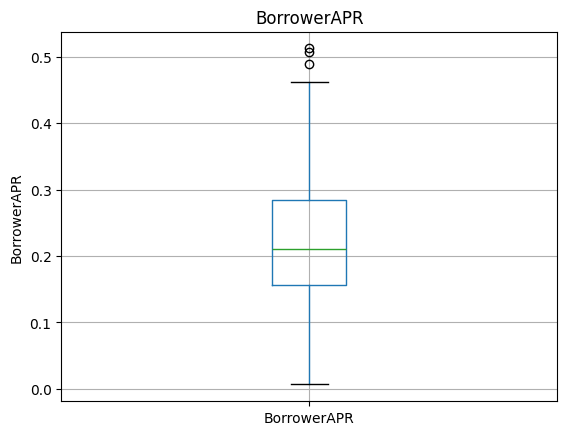

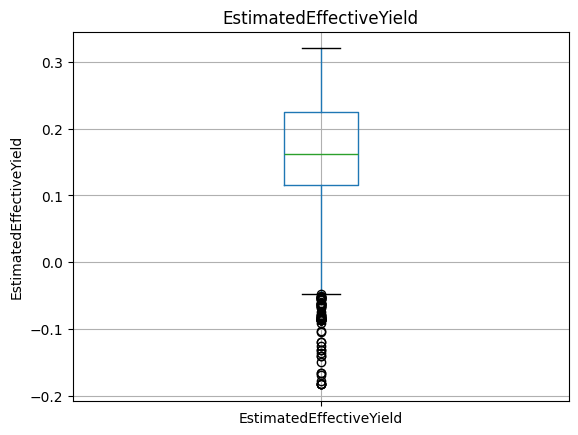

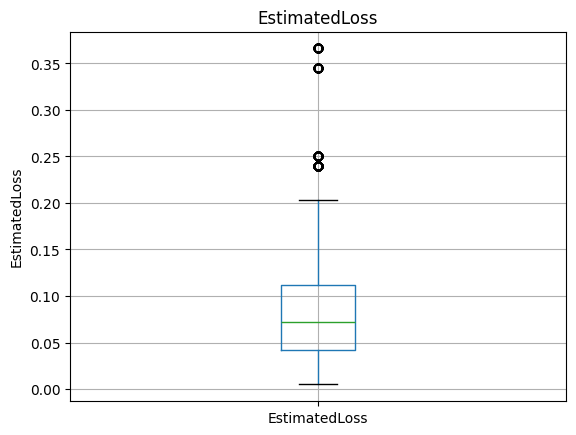

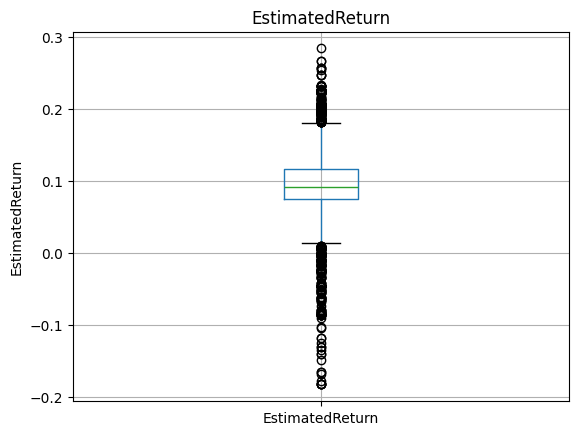

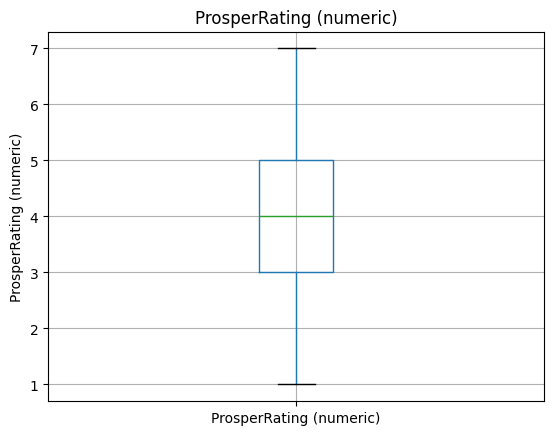

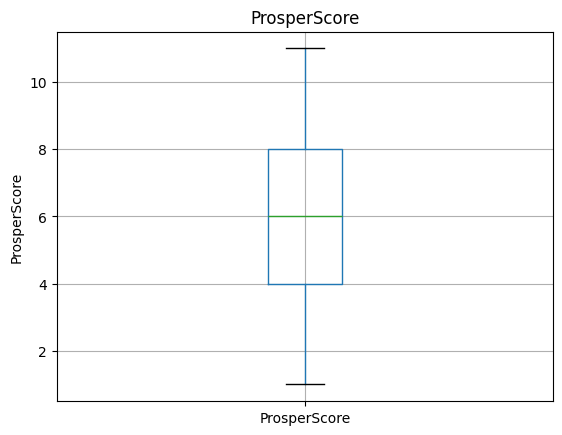

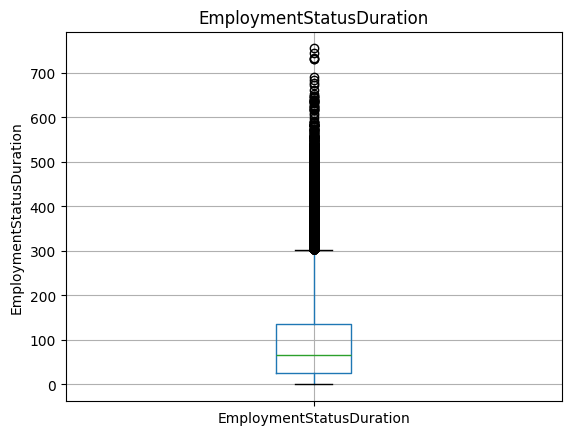

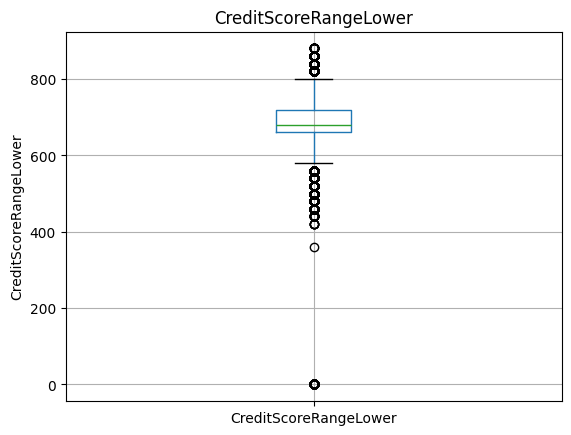

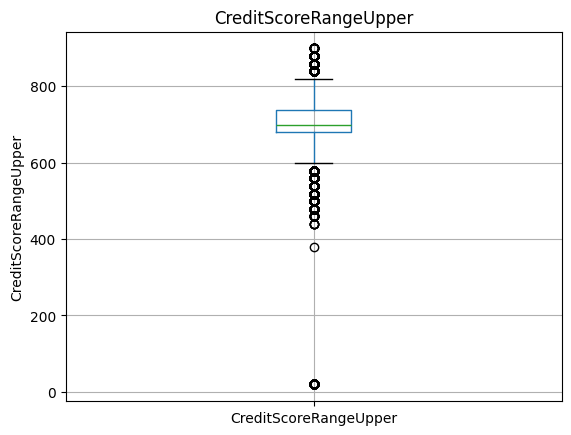

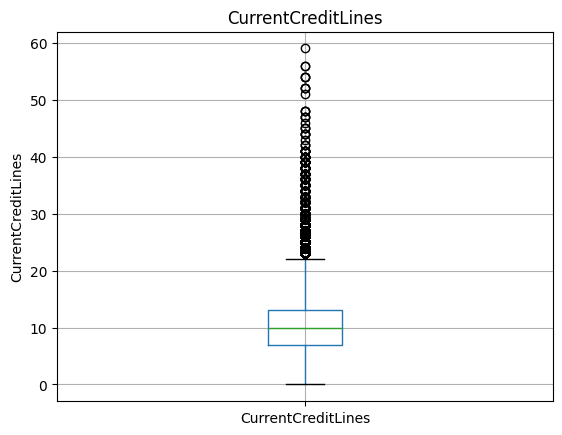

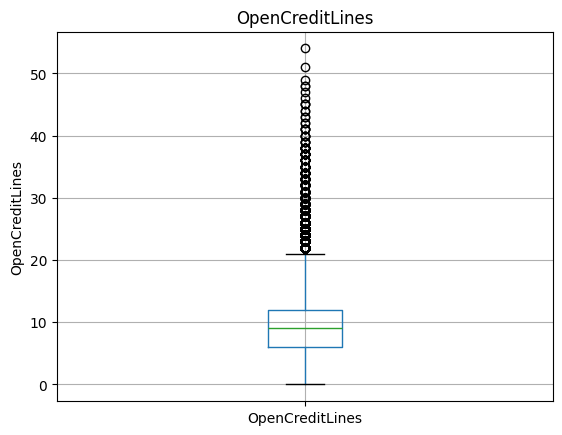

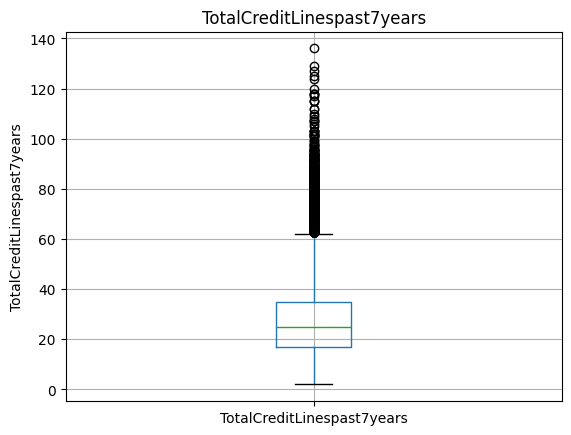

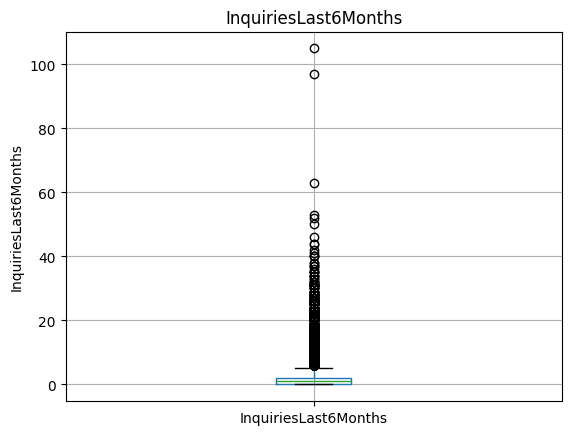

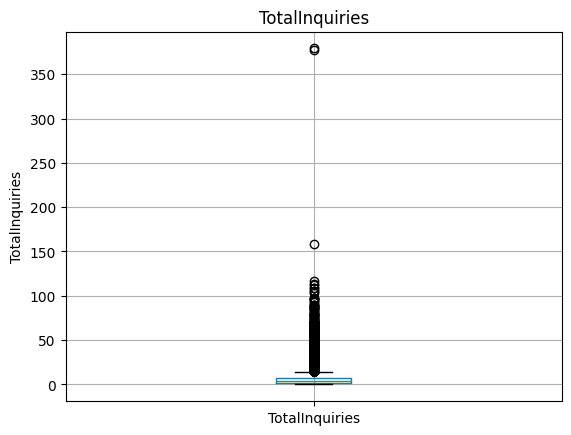

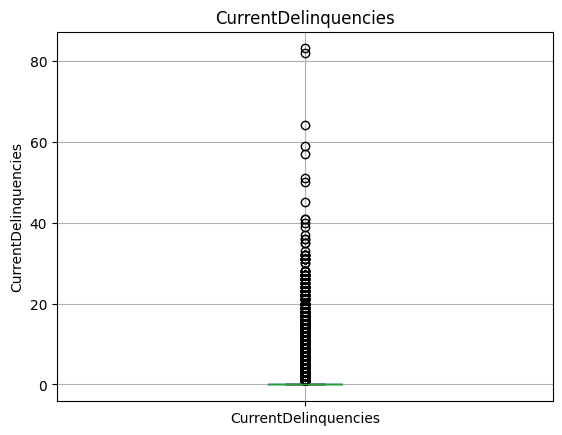

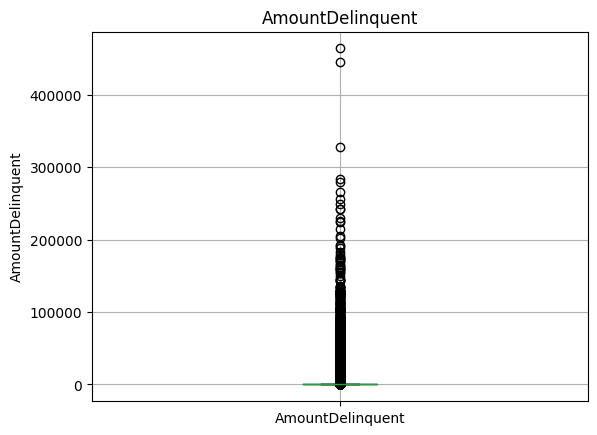

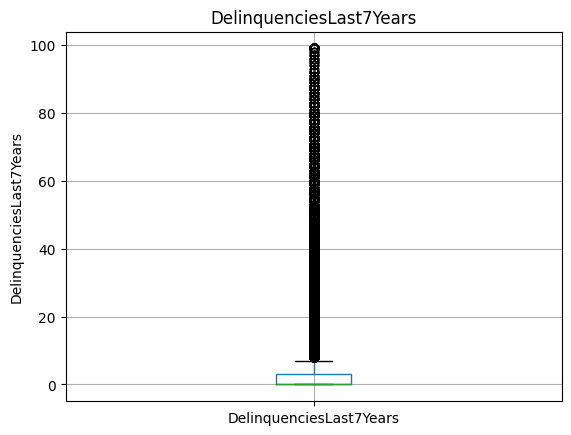

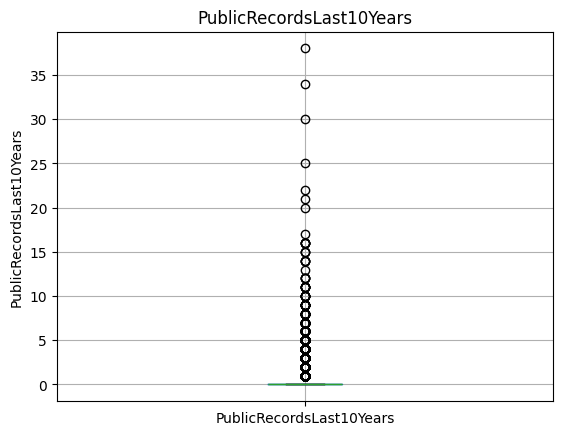

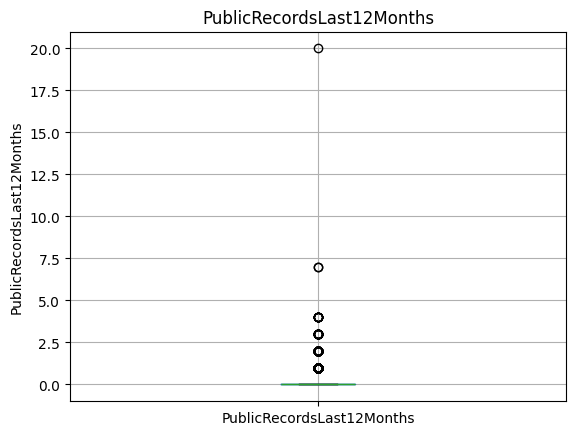

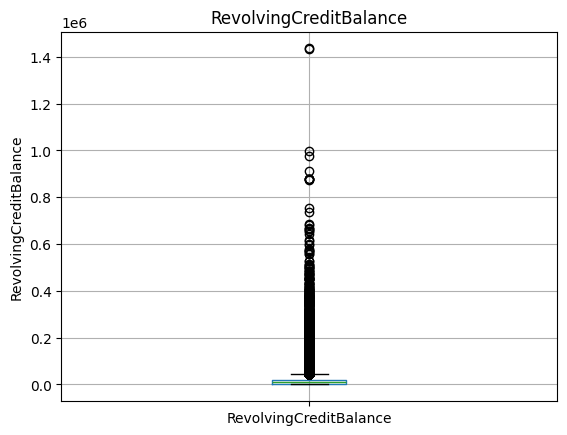

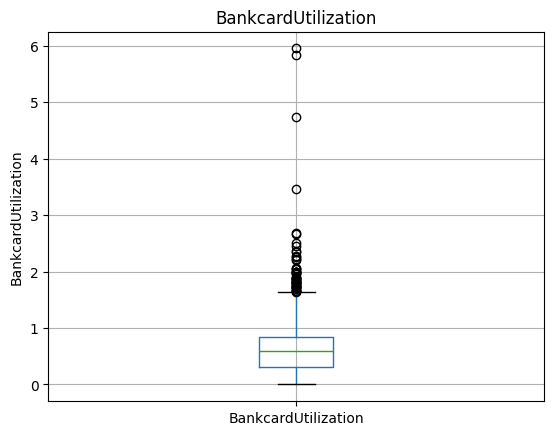

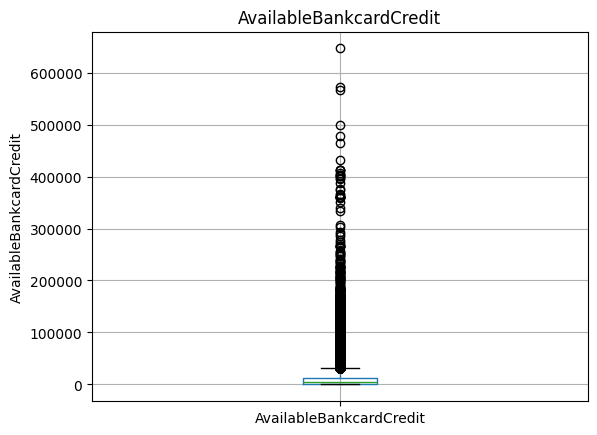

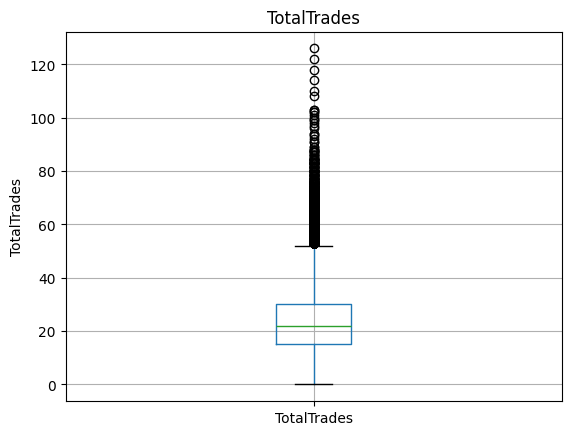

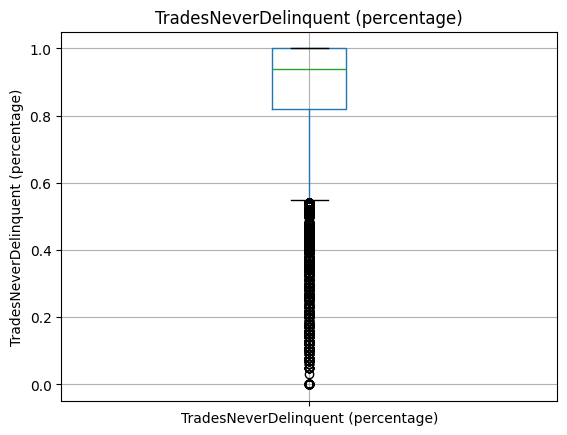

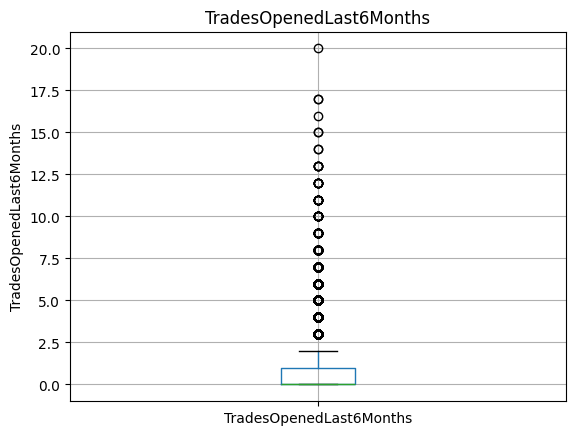

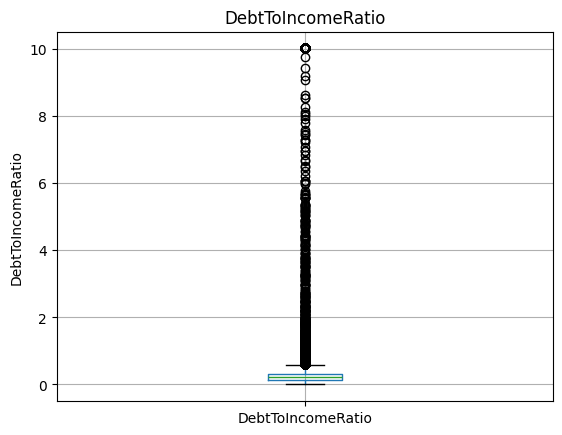

In [21]:
for feature in num_features_nan:
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# Almost all the numerical features containing null values has outliers. So, replacing all null values with median.

In [22]:
# Replacing missing values of the numerical features with median.

for feature in num_features_nan:
    ## Replacing missing values by using median since there are outliers
    median_value = data[feature].median()
    data[feature].fillna(median_value, inplace=True)

C:\Users\adele\AppData\Local\Temp\ipykernel_15764\1619239829.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(median_value, inplace=True)
C:\Users\adele\AppData\Local\Temp\ipykernel_15764\1619239829.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [23]:
data[num_features_nan].isnull().sum()

BorrowerAPR                           0
EstimatedEffectiveYield               0
EstimatedLoss                         0
EstimatedReturn                       0
ProsperRating (numeric)               0
ProsperScore                          0
EmploymentStatusDuration              0
CreditScoreRangeLower                 0
CreditScoreRangeUpper                 0
CurrentCreditLines                    0
OpenCreditLines                       0
TotalCreditLinespast7years            0
InquiriesLast6Months                  0
TotalInquiries                        0
CurrentDelinquencies                  0
AmountDelinquent                      0
DelinquenciesLast7Years               0
PublicRecordsLast10Years              0
PublicRecordsLast12Months             0
RevolvingCreditBalance                0
BankcardUtilization                   0
AvailableBankcardCredit               0
TotalTrades                           0
TradesNeverDelinquent (percentage)    0
TradesOpenedLast6Months               0


In [24]:
data.isnull().sum()

ListingKey                     0
ListingNumber                  0
ListingCreationDate            0
CreditGrade                    0
Term                           0
                              ..
PercentFunded                  0
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
Length: 71, dtype: int64

In [25]:
data.shape

(113937, 71)

All the null values has been removed.

In [26]:
data.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1     Missing    36    Current              Missing      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3     Missing    36    Current              Missing      0.12528   
4     Missing    36    Current              Missing      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                  0.16150         0.0724   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                  0.16150         0.0724   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0          0.09170                      4.0               Missing   
1          0.05470                      6.0                     A   
2          0.09170                      4.0               Missing   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           6.0                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           6.0                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                      67.0                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup               DateCreditPulled  CreditScoreRangeLower  \
0              True  2007-08-26 18:41:46.780000000                  640.0   
1             False            2014-02-27 08:28:14                  680.0   
2              True  2007-01-02 14:09:10.060000000                  480.0   
3             False            2012-10-22 11:02:32                  800.0   
4             False            2013-09-14 18:38:44                  680.0   

   CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  \
0                  659.0     2001-10-11 00:00:00                 5.0   
1                  699.0     1996-03-18 00:00:00                14.0   
2                  499.0     2002-07-27 00:00:00                10.0   
3                  819.0     1983-02-28 00:00:00                 5.0   
4                  699.0     2004-02-20 00:00:00                19.0   

   OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
0              4.0                        12.0                      1   
1             14.0                        29.0                     13   
2              9.0                         3.0                      0   
3              5.0                        29.0                      7   
4             19.0                        49.0                      6   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                         24.

# LoanStatus is the dependent feature and it has multiple categories such as Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress and PastDue.

Distribution of LoanStatus variable

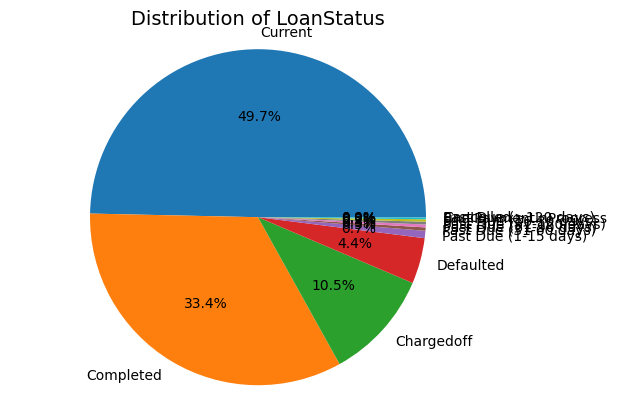

In [27]:
# Pie-chart

target = data['LoanStatus'].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Distribution of LoanStatus", fontsize=14)
plt.show()

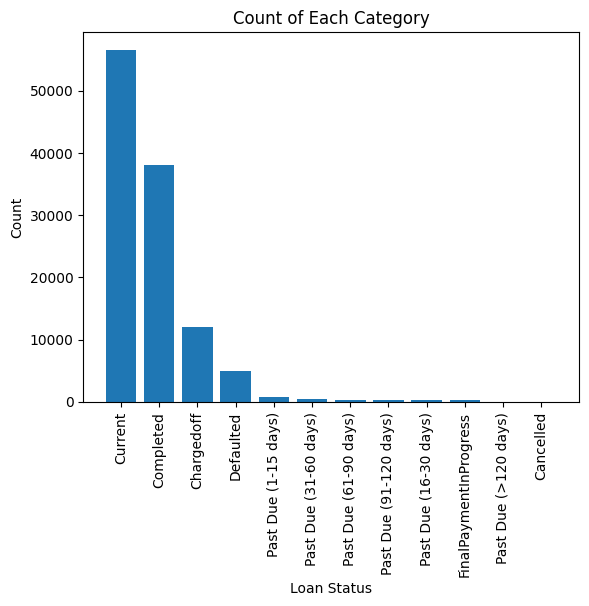

In [28]:
# Bar plot

# Get the count of unique values in the 'Category' column
target = data['LoanStatus'].value_counts()

# Create the bar plot
plt.bar(target.index, target.values)

# Adding title and labels
plt.title('Count of Each Category')
plt.xlabel('Loan Status')
plt.ylabel('Count')

plt.xticks(rotation=90)

# Show the plot
plt.show()

In [29]:
# Counts of each category in LoanStatus.

loan_status_counts = data['LoanStatus'].value_counts()

loan_status_df = pd.DataFrame({
    'Loan Status': loan_status_counts.index,
    'Counts': loan_status_counts.values
})

loan_status_df

Loan Status  Counts
0                  Current   56576
1                Completed   38074
2               Chargedoff   11992
3                Defaulted    5018
4     Past Due (1-15 days)     806
5    Past Due (31-60 days)     363
6    Past Due (61-90 days)     313
7   Past Due (91-120 days)     304
8    Past Due (16-30 days)     265
9   FinalPaymentInProgress     205
10    Past Due (>120 days)      16
11               Cancelled       5

Classifying different categories of loan status to binary as 'Defaulted': 1 and Non-Defaulted: 0. 

In [30]:
def classify_loan(row):
    # If LoanStatus is already "Defaulted" or "Chargedoff", mark as Defaulted
    if row['LoanStatus'] in ['Defaulted', 'Chargedoff']:
        return 1
    
    # If LoanCurrentDaysDelinquent exceeds 90 days and the loan is closed (has a ClosedDate), mark as Defaulted
    elif row['LoanCurrentDaysDelinquent'] > 180 and pd.notnull(row['ClosedDate']):
        return 1
    
    # Otherwise, consider the loan Not Defaulted
    else:
        return 0

In [31]:
# Apply the classification logic

data['IsDefaulted'] = data.apply(classify_loan, axis=1)

In [32]:
data['IsDefaulted'].value_counts()

IsDefaulted
0    96927
1    17010
Name: count, dtype: int64

In [33]:
# Now remove LoanStatus column.

data = data.drop(['LoanStatus'], axis=1)

In [34]:
data.shape

(113937, 71)

In [35]:
data.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term           ClosedDate  BorrowerAPR  BorrowerRate  \
0           C    36  2009-08-14 00:00:00      0.16516        0.1580   
1     Missing    36              Missing      0.12016        0.0920   
2          HR    36  2009-12-17 00:00:00      0.28269        0.2750   
3     Missing    36              Missing      0.12528        0.0974   
4     Missing    36              Missing      0.24614        0.2085   

   LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0       0.1380                  0.16150         0.0724          0.09170   
1       0.0820                  0.07960         0.0249          0.05470   
2       0.2400                  0.16150         0.0724          0.09170   
3       0.0874                  0.08490         0.0249          0.06000   
4       0.1985                  0.18316         0.0925          0.09066   

   ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
0                      4.0               Missing           6.0   
1                      6.0                     A           7.0   
2                      4.0               Missing           6.0   
3                      6.0                     A           9.0   
4                      3.0                     D           4.0   

   ListingCategory (numeric) BorrowerState     Occupation EmploymentStatus  \
0                          0            CO          Other    Self-employed   
1                          2            CO   Professional         Employed   
2                          0            GA          Other    Not available   
3                         16            GA  Skilled Labor         Employed   
4                          2            MN      Executive         Employed   

   EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
0                       2.0                 True              True   
1                      44.0                False             False   
2                      67.0                False              True   
3                     113.0                 True             False   
4                      44.0                 True             False   

                DateCreditPulled  CreditScoreRangeLower  \
0  2007-08-26 18:41:46.780000000                  640.0   
1            2014-02-27 08:28:14                  680.0   
2  2007-01-02 14:09:10.060000000                  480.0   
3            2012-10-22 11:02:32                  800.0   
4            2013-09-14 18:38:44                  680.0   

   CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  \
0                  659.0     2001-10-11 00:00:00                 5.0   
1                  699.0     1996-03-18 00:00:00                14.0   
2                  499.0     2002-07-27 00:00:00                10.0   
3                  819.0     1983-02-28 00:00:00                 5.0   
4                  699.0     2004-02-20 00:00:00                19.0   

   OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
0              4.0                        12.0                      1   
1             14.0                        29.0                     13   
2              9.0                         3.0                      0   
3              5.0                        29.0                      7   
4             19.0                        49.0                      6   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                         24.0                   3.0             3.0   
1                      

The features "ListingKey", "ListingNumber", "LoanKey", "LoanNumber" and "MemberKey" are all unique keys which doesn't provide significant contribution to the analysis. So, it must be removed.

In [36]:
data = data.drop(['ListingKey', 'ListingNumber', 'LoanKey', 'LoanNumber', 'MemberKey'], axis=1)

In [37]:
data.head()

ListingCreationDate CreditGrade  Term           ClosedDate  \
0  2007-08-26 19:09:29.263000000           C    36  2009-08-14 00:00:00   
1  2014-02-27 08:28:07.900000000     Missing    36              Missing   
2  2007-01-05 15:00:47.090000000          HR    36  2009-12-17 00:00:00   
3  2012-10-22 11:02:35.010000000     Missing    36              Missing   
4  2013-09-14 18:38:39.097000000     Missing    36              Missing   

   BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
0      0.16516        0.1580       0.1380                  0.16150   
1      0.12016        0.0920       0.0820                  0.07960   
2      0.28269        0.2750       0.2400                  0.16150   
3      0.12528        0.0974       0.0874                  0.08490   
4      0.24614        0.2085       0.1985                  0.18316   

   EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
0         0.0724          0.09170                      4.0   
1         0.0249          0.05470                      6.0   
2         0.0724          0.09170                      4.0   
3         0.0249          0.06000                      6.0   
4         0.0925          0.09066                      3.0   

  ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)  \
0               Missing           6.0                          0   
1                     A           7.0                          2   
2               Missing           6.0                          0   
3                     A           9.0                         16   
4                     D           4.0                          2   

  BorrowerState     Occupation EmploymentStatus  EmploymentStatusDuration  \
0            CO          Other    Self-employed                       2.0   
1            CO   Professional         Employed                      44.0   
2            GA          Other    Not available                      67.0   
3            GA  Skilled Labor         Employed                     113.0   
4            MN      Executive         Employed                      44.0   

   IsBorrowerHomeowner  CurrentlyInGroup               DateCreditPulled  \
0                 True              True  2007-08-26 18:41:46.780000000   
1                False             False            2014-02-27 08:28:14   
2                False              True  2007-01-02 14:09:10.060000000   
3                 True             False            2012-10-22 11:02:32   
4                 True             False            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                10.0              9.0                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0                      1                         24.0                   3.0   
1                     13                        389.0                   3.0   
2                      0                          0.0                   0.0   
3                      7                        115.0                   0.0   
4                      6                        220.0                   1.0   

   TotalInquiries  CurrentDelinquencies  AmountDelinquent  \
0             3.0                   2

In [38]:
# The feature "ProsperScore" should have values between 1-10. But, it also has a value of 11. So, replacing it to 10.

ProsperScore_counts = data['ProsperScore'].value_counts()

ProsperScore_df = pd.DataFrame({
    'Prosper Score': ProsperScore_counts.index,
    'Counts': ProsperScore_counts.values
})

ProsperScore_df

Prosper Score  Counts
0             6.0   41362
1             4.0   12595
2             8.0   12053
3             7.0   10597
4             5.0    9813
5             3.0    7642
6             9.0    6911
7             2.0    5766
8            10.0    4750
9            11.0    1456
10            1.0     992

In [39]:
# ProsperScore feature has values between 1-10. But, we have the value '11'. So, replacing it by 10 as it indicates the lowest risk score.

data['ProsperScore'] = data['ProsperScore'].replace(11, 10)


In [40]:
data['ProsperScore'].unique()

array([ 6.,  7.,  9.,  4., 10.,  2.,  8.,  5.,  3.,  1.])

In [41]:
data.head(20)

ListingCreationDate CreditGrade  Term           ClosedDate  \
0   2007-08-26 19:09:29.263000000           C    36  2009-08-14 00:00:00   
1   2014-02-27 08:28:07.900000000     Missing    36              Missing   
2   2007-01-05 15:00:47.090000000          HR    36  2009-12-17 00:00:00   
3   2012-10-22 11:02:35.010000000     Missing    36              Missing   
4   2013-09-14 18:38:39.097000000     Missing    36              Missing   
5   2013-12-14 08:26:37.093000000     Missing    60              Missing   
6   2013-04-12 09:52:56.147000000     Missing    36              Missing   
7   2013-05-05 06:49:27.493000000     Missing    36              Missing   
8   2013-12-02 10:43:39.117000000     Missing    36              Missing   
9   2013-12-02 10:43:39.117000000     Missing    36              Missing   
10  2012-05-10 07:04:01.577000000     Missing    60              Missing   
11  2007-10-09 20:28:33.640000000           C    36  2008-01-07 00:00:00   
12  2013-12-15 20:01:10.757000000     Missing    36              Missing   
13  2013-07-15 16:28:28.087000000     Missing    36              Missing   
14  2013-04-19 11:17:41.700000000     Missing    60              Missing   
15  2012-04-10 09:14:46.297000000     Missing    36  2012-12-19 00:00:00   
16  2013-07-16 12:42:48.680000000     Missing    60              Missing   
17  2006-08-15 12:21:09.433000000          AA    36  2008-05-22 00:00:00   
18  2013-02-20 03:48:37.470000000     Missing    36              Missing   
19  2013-08-21 06:49:02.093000000     Missing    60              Missing   

    BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
0       0.16516        0.1580       0.1380                  0.16150   
1       0.12016        0.0920       0.0820                  0.07960   
2       0.28269        0.2750       0.2400                  0.16150   
3       0.12528        0.0974       0.0874                  0.08490   
4       0.24614        0.2085       0.1985                  0.18316   
5       0.15425        0.1314       0.1214                  0.11567   
6       0.31032        0.2712       0.2612                  0.23820   
7       0.23939        0.2019       0.1919                  0.17830   
8       0.07620        0.0629       0.0529                  0.05221   
9       0.07620        0.0629       0.0529                  0.05221   
10      0.27462        0.2489       0.2389                  0.23320   
11      0.15033        0.1325       0.1225                  0.16150   
12      0.17969        0.1435       0.1335                  0.12640   
13      0.13138        0.1034       0.0934                  0.09050   
14      0.11695        0.0949       0.0849                  0.08270   
15      0.35797        0.3177       0.3077                  0.28960   
16      0.30748        0.2809       0.2709                  0.24730   
17      0.13202        0.1250       0.1175                  0.16150   
18      0.12528        0.0974       0.0874                  0.08490   
19      0.24754        0.2225       0.2125                  0.19520   

    EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
0          0.0724          0.09170                      4.0   
1          0.0249          0.05470                      6.0   
2          0.0724          0.09170                      4.0   
3          0.0249          0.06000                      6.0   
4          0.0925          0.09066                      3.0   
5          0.0449          0.07077                      5.0   
6          0.1275          0.11070                      2.0   
7          0.0799          0.09840                      4.0   
8          0.0099          0.04231                      7.0   
9          0.0099          0.04231                      7.0   
10         0.0890          0.14420                      4.0   
11         0.0724          0.09170                      4.0   
12         0.0524          0.07400                      5.0   
13         0.0274          0.06310         

# EDA

EDA on numeric features.

In [42]:
# Summary statistics for numeric features

data.describe()

Term    BorrowerAPR   BorrowerRate    LenderYield  \
count  113937.000000  113937.000000  113937.000000  113937.000000   
mean       40.830248       0.218826       0.192764       0.182701   
std        10.436212       0.080355       0.074818       0.074516   
min        12.000000       0.006530       0.000000      -0.010000   
25%        36.000000       0.156290       0.134000       0.124200   
50%        36.000000       0.209760       0.184000       0.173000   
75%        36.000000       0.283700       0.250000       0.240000   
max        60.000000       0.512290       0.497500       0.492500   

       EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count            113937.000000  113937.000000    113937.000000   
mean                  0.166833       0.078288         0.094953   
std                   0.059168       0.040503         0.026306   
min                  -0.182700       0.004900        -0.182700   
25%                   0.132600       0.054900         0.080220   
50%                   0.161500       0.072400         0.091700   
75%                   0.195200       0.097500         0.108700   
max                   0.319900       0.366000         0.283700   

       ProsperRating (numeric)   ProsperScore  ListingCategory (numeric)  \
count            113937.000000  113937.000000              113937.000000   
mean                  4.053802       5.950034                   2.774209   
std                   1.444304       2.022480                   3.996797   
min                   1.000000       1.000000                   0.000000   
25%                   3.000000       5.000000                   1.000000   
50%                   4.000000       6.000000                   1.000000   
75%                   5.000000       7.000000                   3.000000   
max                   7.000000      10.000000                  20.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             113937.000000          113937.000000          113937.000000   
mean                  94.126026             685.538850             704.538850   
std                   91.553055              66.286893              66.286893   
min                    0.000000               0.000000              19.000000   
25%                   28.000000             660.000000             679.000000   
50%                   67.000000             680.000000             699.000000   
75%                  130.000000             720.000000             739.000000   
max                  755.000000             880.000000             899.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count       113937.000000    113937.000000               113937.000000   
mean            10.296023         9.242801                   26.743806   
std              5.273189         4.852581                   13.596780   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   17.000000   
50%             10.000000         9.000000                   25.000000   
75%             13.000000        12.000000                   35.000000   
max             59.000000        54.000000                  136.000000   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
count           113937.00000                113937.000000   
mean                 6.96979                   398.292161   
std                  4.63097                   447.159711   
min                  0.00000                     0.000000   
25%                  4.00000                   114.000000   
50%                  6.00000                   271.000000   
75%                  9.00000                   525.000000   
max                 51.00000                 14985.000000   

       InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  \
count         113937.000000   113937.000000         113937.000000   
mean               1.432423  

In [43]:
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('bool')],
      dtype=object)

In [44]:
# Visualizing the distribution of each numeric feature

def plot_numeric_distribution(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    num_cols = len(numeric_cols)
    
    # Calculate rows and columns for subplots
    n_cols = 2  # Fixed number of columns
    n_rows = (num_cols + n_cols - 1) // n_cols  # Calculate rows needed
    
    plt.figure(figsize=(15, n_rows * 5))  # Adjust height based on number of rows
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, n_cols, i)  # Dynamic number of rows and columns
        sns.histplot(df[col], kde=True, stat="density", bins=30)  # KDE for distribution curve
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

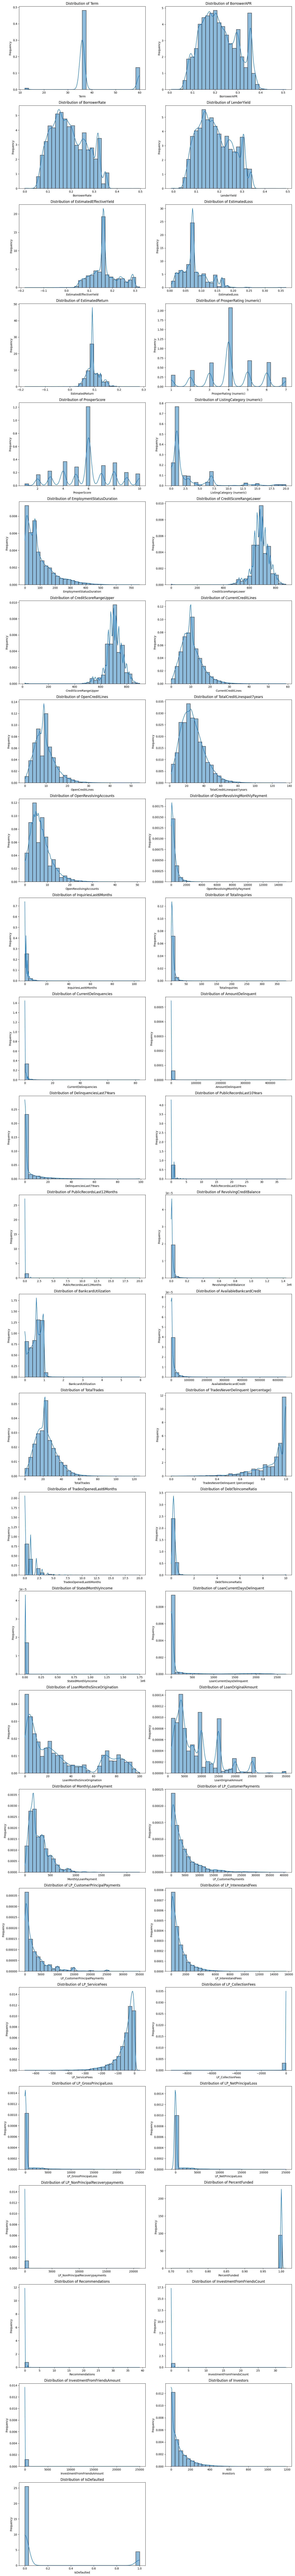

In [45]:
plot_numeric_distribution(data)

The numerical features exhibit skewness and deviate from a normal distribution, with varying ranges across different features. To address this, it is essential to apply appropriate transformations to normalize the data and bring these features onto a consistent scale.

EDA on categorical features.

In [46]:
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols

Index(['ListingCreationDate', 'CreditGrade', 'ClosedDate',
       'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'DateCreditPulled', 'FirstRecordedCreditLine',
       'IncomeRange', 'LoanOriginationDate', 'LoanOriginationQuarter'],
      dtype='object')

In [47]:
data['LoanOriginationQuarter'].unique()

array(['Q3 2007', 'Q1 2014', 'Q1 2007', 'Q4 2012', 'Q3 2013', 'Q4 2013',
       'Q2 2013', 'Q2 2012', 'Q4 2007', 'Q3 2006', 'Q1 2013', 'Q2 2010',
       'Q1 2012', 'Q3 2012', 'Q4 2010', 'Q4 2011', 'Q3 2008', 'Q2 2007',
       'Q4 2006', 'Q2 2011', 'Q1 2011', 'Q1 2008', 'Q3 2009', 'Q3 2011',
       'Q2 2008', 'Q1 2010', 'Q4 2009', 'Q2 2006', 'Q3 2010', 'Q1 2006',
       'Q4 2008', 'Q4 2005', 'Q2 2009'], dtype=object)

In [48]:
def plot_categorical_distribution_bar(attr, labels=None):
    plot = sns.catplot(x=attr, kind='count', data=data, height = 6, aspect = 1.5)
    plot.set_xticklabels(rotation=90)
    
    plt.show()

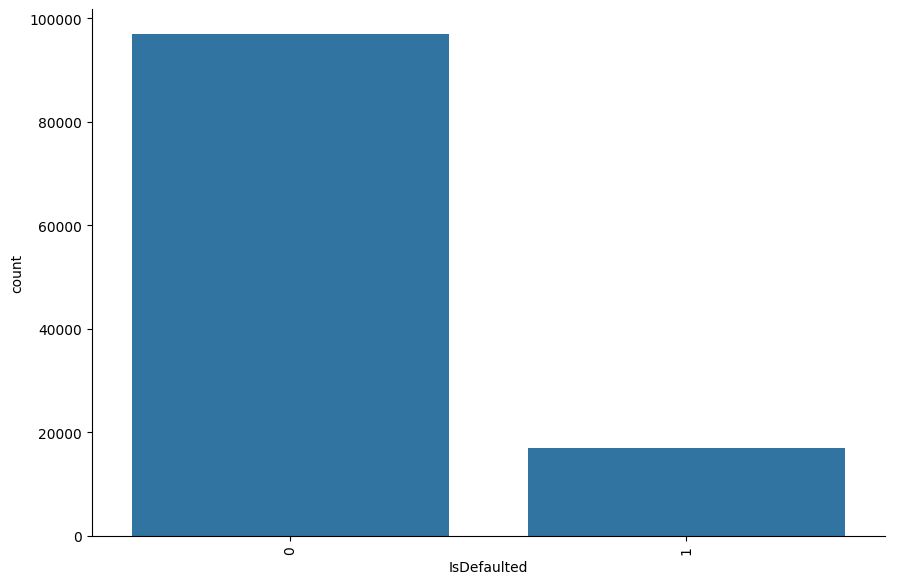

In [49]:
plot_categorical_distribution_bar('IsDefaulted')

The number of borrowers who has been "Defaulted" (1) is way greater than that of "Non-Defaulted" (0) borrowers. Hence we have skewed classes and the dataset is imbalanced.

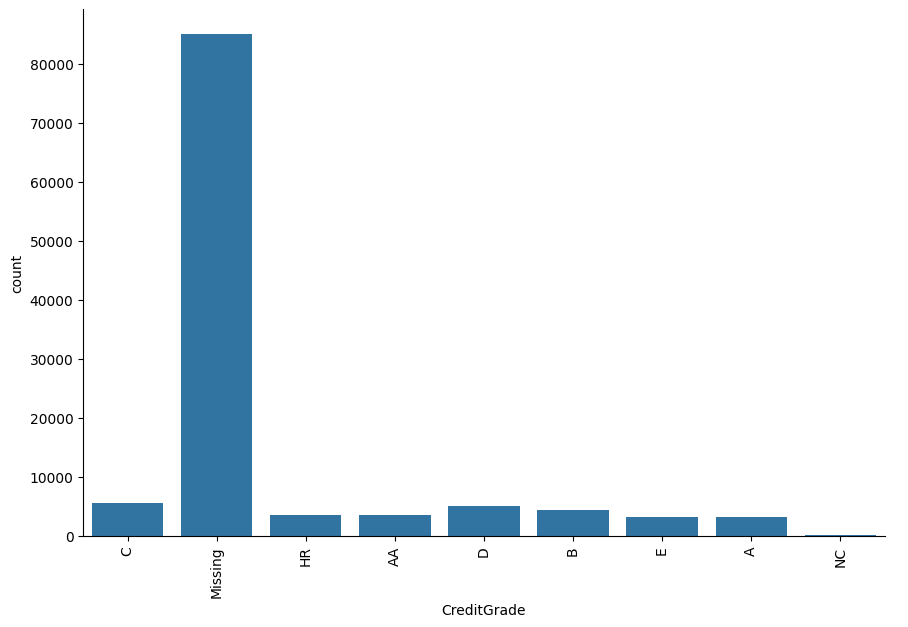

In [50]:
plot_categorical_distribution_bar('CreditGrade')

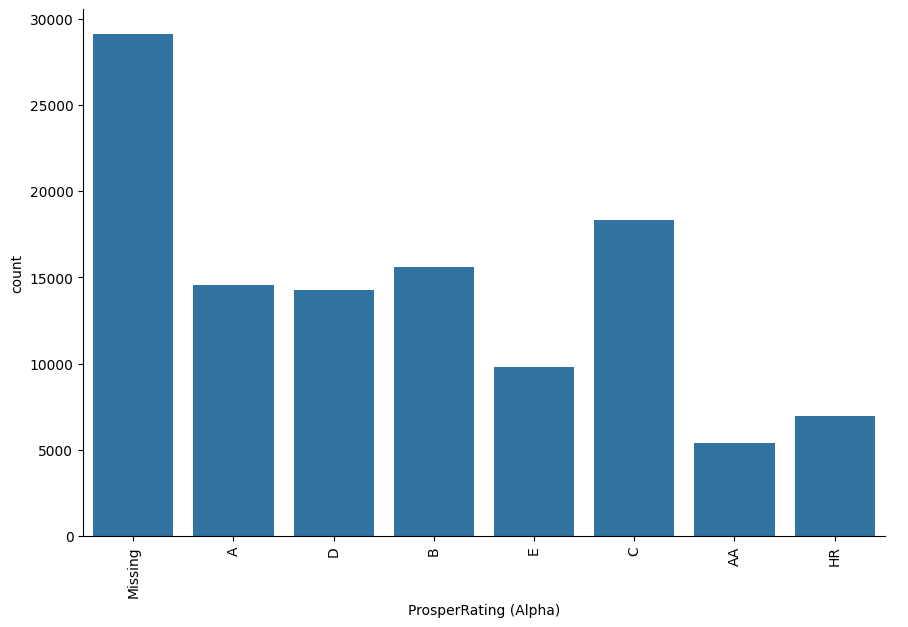

In [51]:
plot_categorical_distribution_bar('ProsperRating (Alpha)')

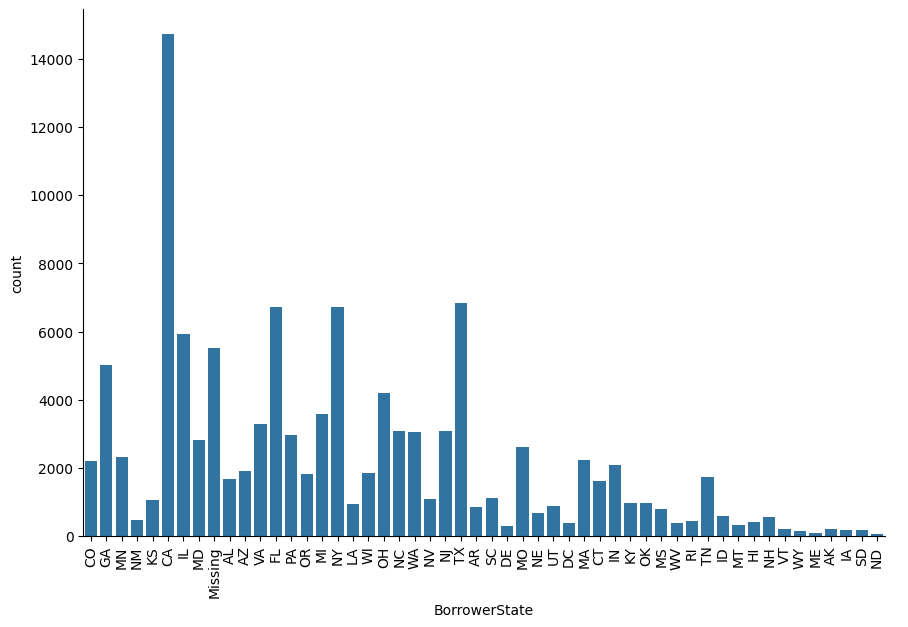

In [52]:
plot_categorical_distribution_bar('BorrowerState')

The majority of the borrowers are based in California (CA), making it the state with the highest concentration of borrowers in the records.

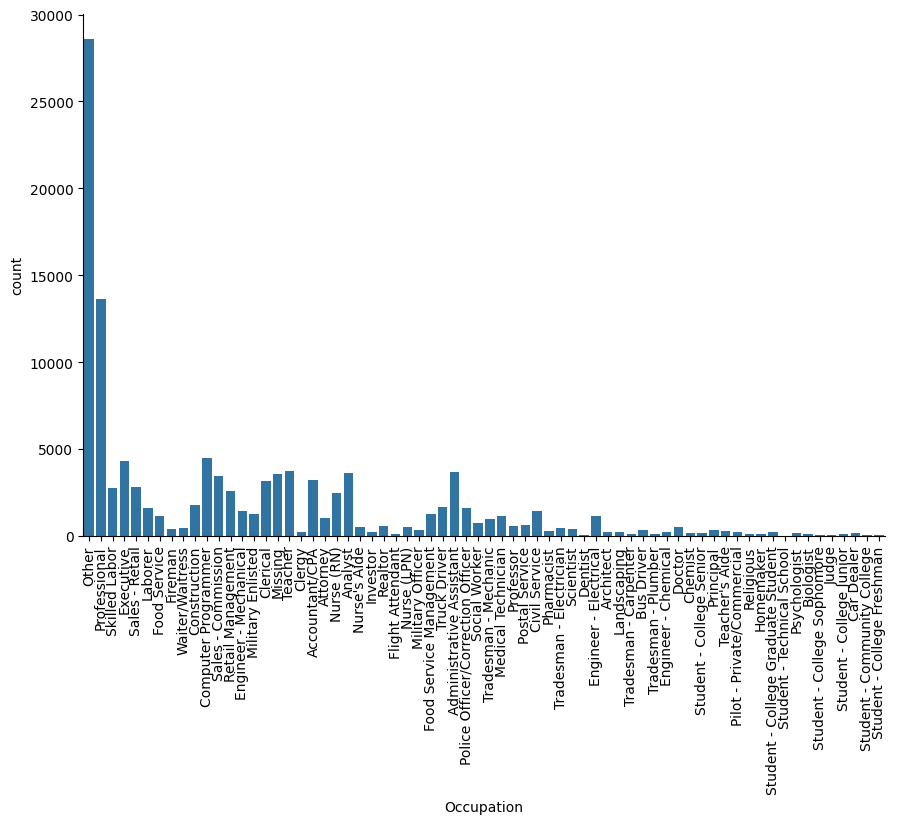

In [53]:
plot_categorical_distribution_bar('Occupation')

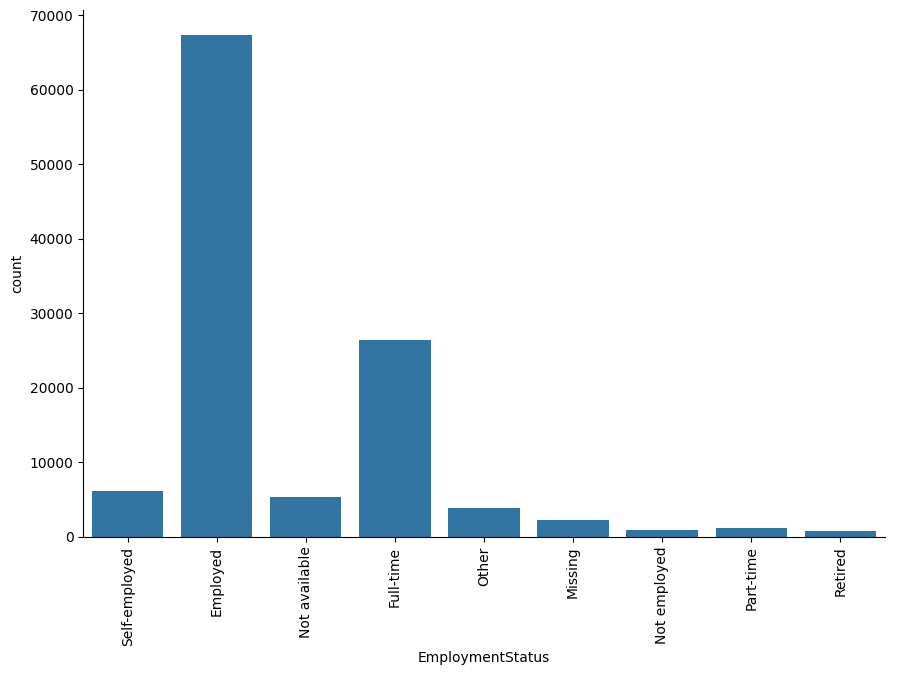

In [54]:
plot_categorical_distribution_bar('EmploymentStatus')

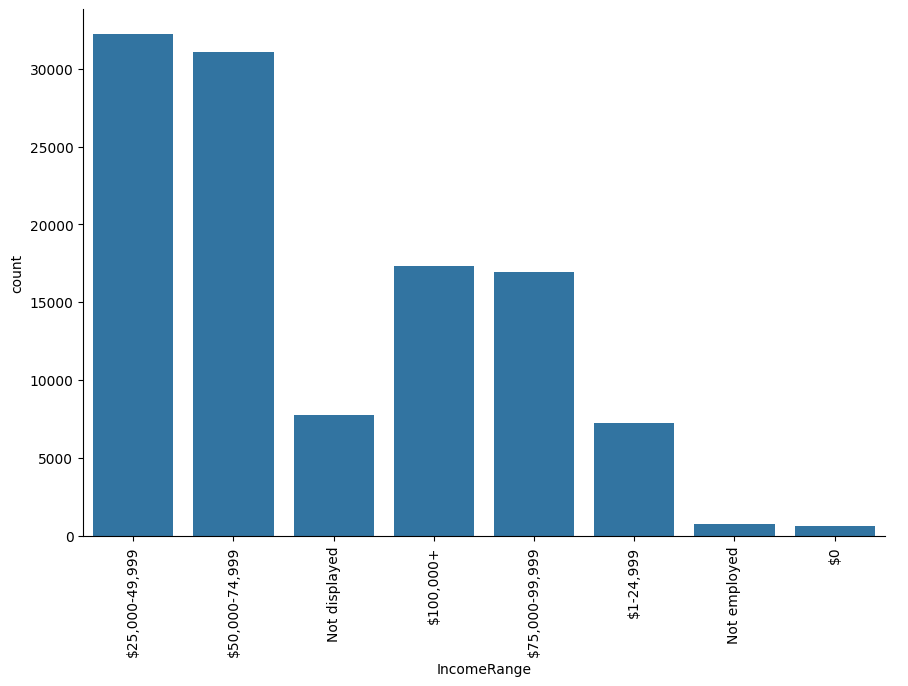

In [55]:
plot_categorical_distribution_bar('IncomeRange')

The majority of borrowers fall within the income brackets of "$25k - $50k" and "$50k - $75k," indicating that most loans are accessed by individuals in these moderate-income groups. A significant portion of borrowers also comes from the higher income ranges of "$75k - $100k" and "$100k+," showing a broad distribution across various income levels. However, only a small fraction of borrowers report earnings exceeding $125k, suggesting that high-income individuals are less represented among the borrowing population.

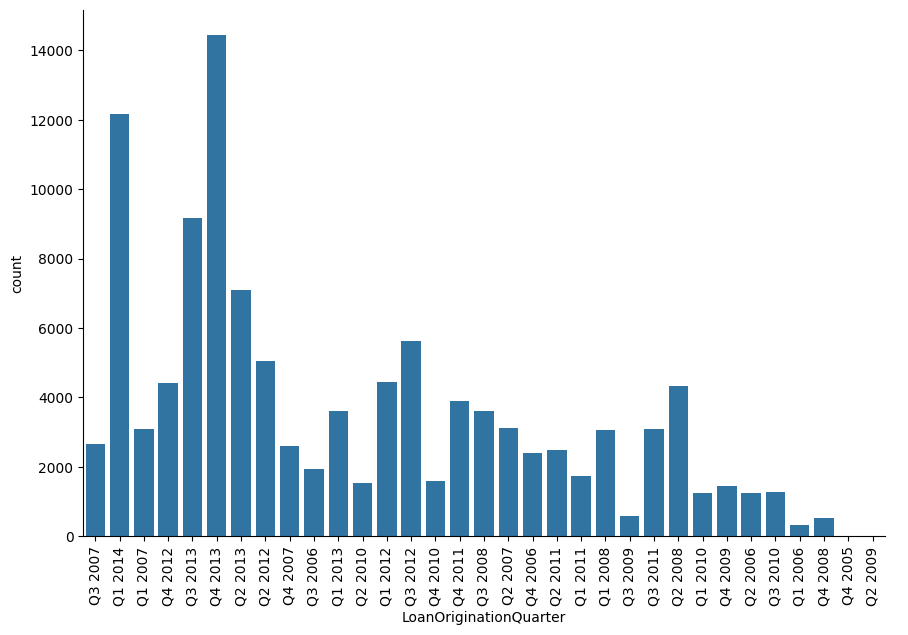

In [56]:
plot_categorical_distribution_bar('LoanOriginationQuarter')

The chart indicates that the majority of loan originations occurred between 2007 and 2013. After this period, there is a noticeable decline in the number of loans being originated over time.

In [57]:
# Boolean features

boolean_features = [feature for feature in data.columns if data[feature].dtypes == 'bool']
boolean_features

['IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeVerifiable']

In [58]:
# Taking discrete numerical features and boolean features

discrete_num_features = [feature for feature in data.columns if len(data[feature].unique()) < 50]

print(discrete_num_features)

print('Discrete variables count: {}'.format(len(discrete_num_features)))

['CreditGrade', 'Term', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'OpenRevolvingAccounts', 'CurrentDelinquencies', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'TradesOpenedLast6Months', 'IncomeRange', 'IncomeVerifiable', 'LoanOriginationQuarter', 'Recommendations', 'InvestmentFromFriendsCount', 'IsDefaulted']
Discrete variables count: 22


In [59]:
# Extracting feature names

numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

discrete_num_features = [feature for feature in numeric_features if len(data[feature].unique()) < 50]

discrete_and_bool_features = discrete_num_features + boolean_features

discrete_and_bool_features

['Term',
 'ProsperRating (numeric)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'OpenRevolvingAccounts',
 'CurrentDelinquencies',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'TradesOpenedLast6Months',
 'Recommendations',
 'InvestmentFromFriendsCount',
 'IsDefaulted',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'IncomeVerifiable']

From the above set of features, assuming "CreditScoreRangeLower", "CreditScoreRangeUpper", "OpenRevolvingAccounts", "CurrentDelinquencies", "PublicRecordsLast10Years", "PublicRecordsLast12Months", "TradesOpenedLast6Months", "Recommendations", "InvestmentFromFriendsCount" as continuous numeric features.

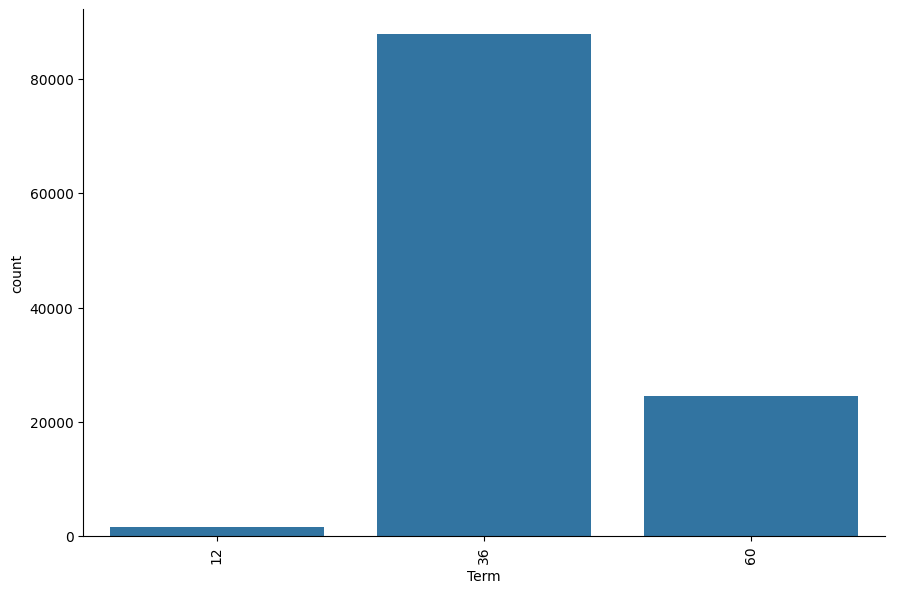

In [60]:
plot_categorical_distribution_bar('Term')

The majority of borrowers have opted for a 36-month term when borrowing money from lenders.

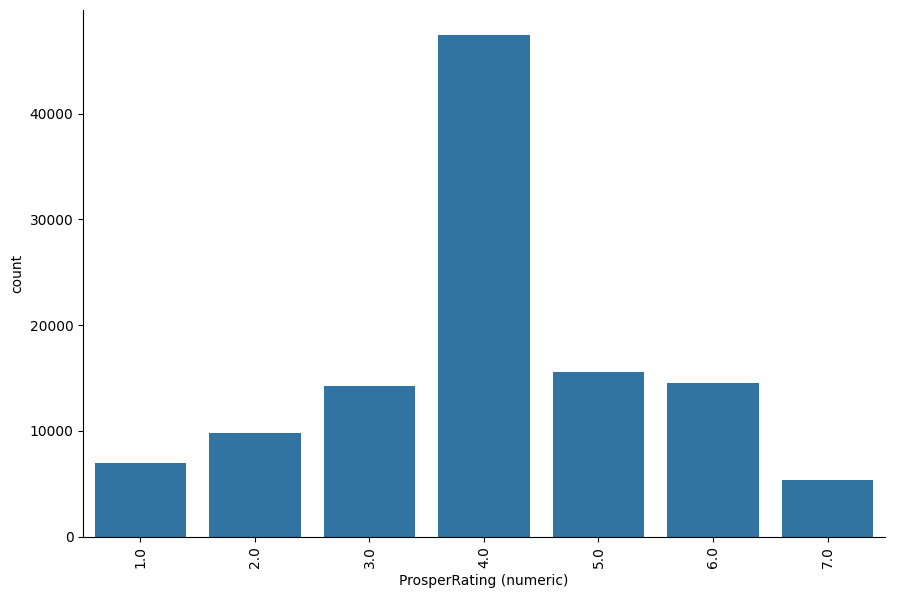

In [61]:
plot_categorical_distribution_bar('ProsperRating (numeric)')

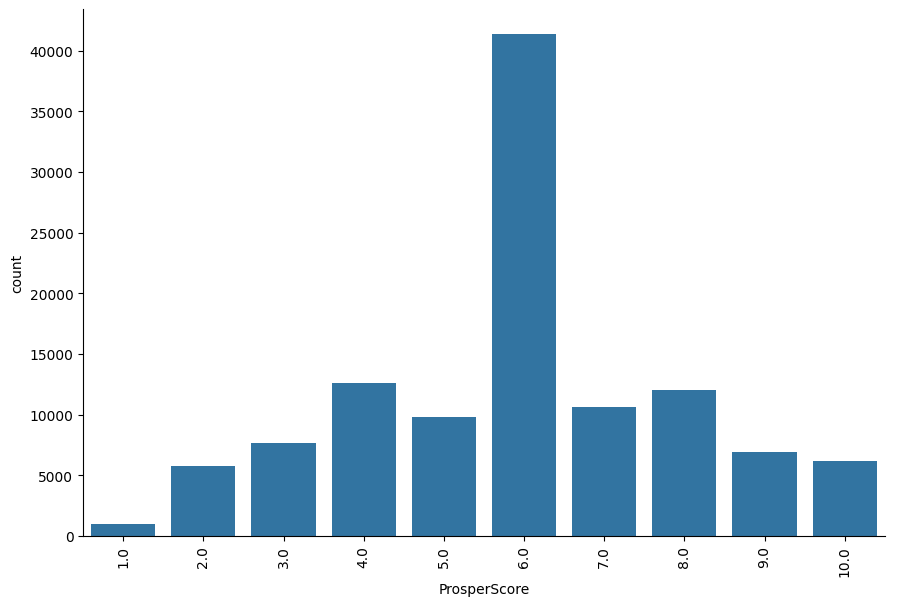

In [62]:
plot_categorical_distribution_bar('ProsperScore')

A notable portion of the total borrowers fall within a ProsperScore of 6.0, indicating that these individuals represent a moderate risk category. They are neither classified as high-risk borrowers nor as the most creditworthy, placing them in a balanced middle ground in terms of lending risk.

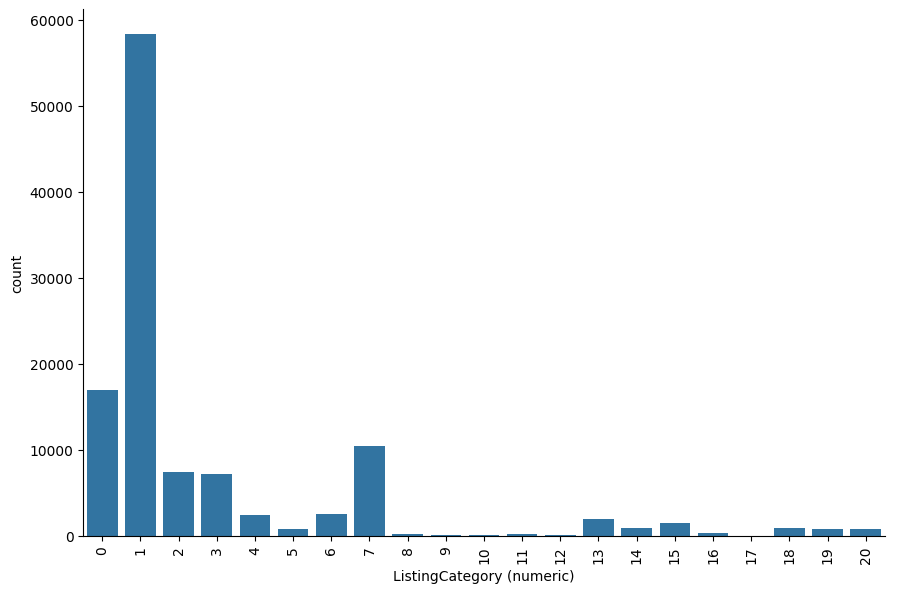

In [63]:
plot_categorical_distribution_bar('ListingCategory (numeric)')

Most of the borrowers selected the listing category as "Debt Consolidation" when posting their listing.

maximum number of borrowers take the loan for "Debt Consolidation" purpose.

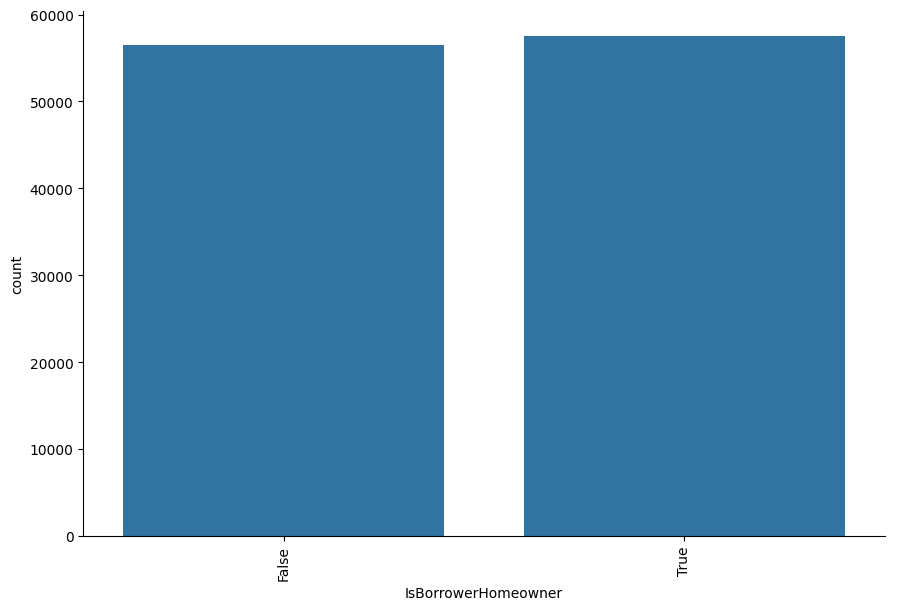

In [64]:
plot_categorical_distribution_bar('IsBorrowerHomeowner')

The ratio of borrowers is fairly balanced between homeowners and non-homeowners.

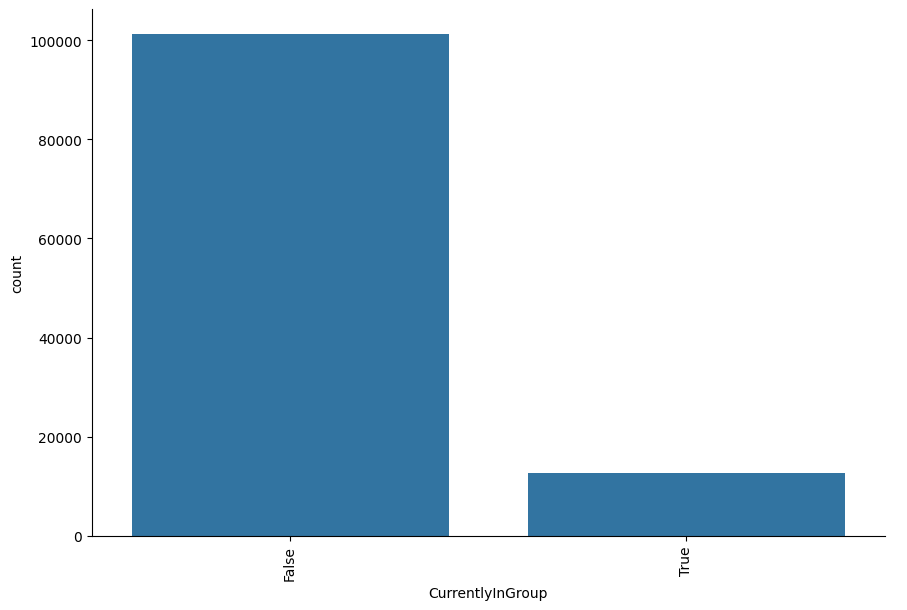

In [65]:
plot_categorical_distribution_bar('CurrentlyInGroup')

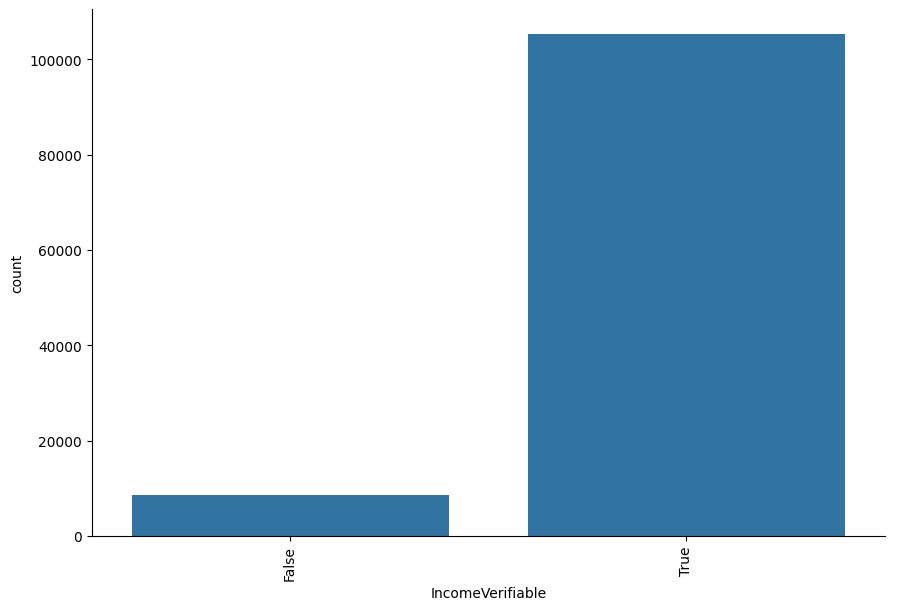

In [66]:
plot_categorical_distribution_bar('IncomeVerifiable')

In [67]:
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('bool')],
      dtype=object)

In [68]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanMonthsSinceOrigination', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'LP_CustomerPayments',
     

In [69]:
numeric_cols

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanMonthsSinceOrigination', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'LP_CustomerPayments',
     

In [70]:
# Remove the 'IsDefaulted' column as it is the dependent feature.

numeric_cols = pd.Index(numeric_cols[:-1])

In [71]:
numeric_cols

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanMonthsSinceOrigination', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'LP_CustomerPayments',
     

In [72]:
data[numeric_cols].describe()

Term    BorrowerAPR   BorrowerRate    LenderYield  \
count  113937.000000  113937.000000  113937.000000  113937.000000   
mean       40.830248       0.218826       0.192764       0.182701   
std        10.436212       0.080355       0.074818       0.074516   
min        12.000000       0.006530       0.000000      -0.010000   
25%        36.000000       0.156290       0.134000       0.124200   
50%        36.000000       0.209760       0.184000       0.173000   
75%        36.000000       0.283700       0.250000       0.240000   
max        60.000000       0.512290       0.497500       0.492500   

       EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count            113937.000000  113937.000000    113937.000000   
mean                  0.166833       0.078288         0.094953   
std                   0.059168       0.040503         0.026306   
min                  -0.182700       0.004900        -0.182700   
25%                   0.132600       0.054900         0.080220   
50%                   0.161500       0.072400         0.091700   
75%                   0.195200       0.097500         0.108700   
max                   0.319900       0.366000         0.283700   

       ProsperRating (numeric)   ProsperScore  ListingCategory (numeric)  \
count            113937.000000  113937.000000              113937.000000   
mean                  4.053802       5.950034                   2.774209   
std                   1.444304       2.022480                   3.996797   
min                   1.000000       1.000000                   0.000000   
25%                   3.000000       5.000000                   1.000000   
50%                   4.000000       6.000000                   1.000000   
75%                   5.000000       7.000000                   3.000000   
max                   7.000000      10.000000                  20.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             113937.000000          113937.000000          113937.000000   
mean                  94.126026             685.538850             704.538850   
std                   91.553055              66.286893              66.286893   
min                    0.000000               0.000000              19.000000   
25%                   28.000000             660.000000             679.000000   
50%                   67.000000             680.000000             699.000000   
75%                  130.000000             720.000000             739.000000   
max                  755.000000             880.000000             899.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count       113937.000000    113937.000000               113937.000000   
mean            10.296023         9.242801                   26.743806   
std              5.273189         4.852581                   13.596780   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   17.000000   
50%             10.000000         9.000000                   25.000000   
75%             13.000000        12.000000                   35.000000   
max             59.000000        54.000000                  136.000000   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
count           113937.00000                113937.000000   
mean                 6.96979                   398.292161   
std                  4.63097                   447.159711   
min                  0.00000                     0.000000   
25%                  4.00000                   114.000000   
50%                  6.00000                   271.000000   
75%                  9.00000                   525.000000   
max                 51.00000                 14985.000000   

       InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  \
count         113937.000000   113937.000000         113937.000000   
mean               1.432423  

Almost all numerical features contains outliers and based on descriptive statistics, the numerical features are also skewed. 

Applying "Yeo-Johnson Transformation" to the numeric columns as it can handle both outliers and positive/negative skewness.

In [73]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

for feature in numeric_cols:
    data[feature] = pt.fit_transform(data[[feature]])

In [74]:
data.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('bool'), dtype('int64')],
      dtype=object)

In [75]:
# Visualizing the distribution of each numeric feature after transformation.

def plot_numeric_distribution(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    num_cols = len(numeric_cols)
    
    # Calculate rows and columns for subplots
    n_cols = 2  # Fixed number of columns
    n_rows = (num_cols + n_cols - 1) // n_cols  # Calculate rows needed
    
    plt.figure(figsize=(15, n_rows * 5))  # Adjust height based on number of rows
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, n_cols, i)  # Dynamic number of rows and columns
        sns.histplot(df[col], kde=True, stat="density", bins=30)  # KDE for distribution curve
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

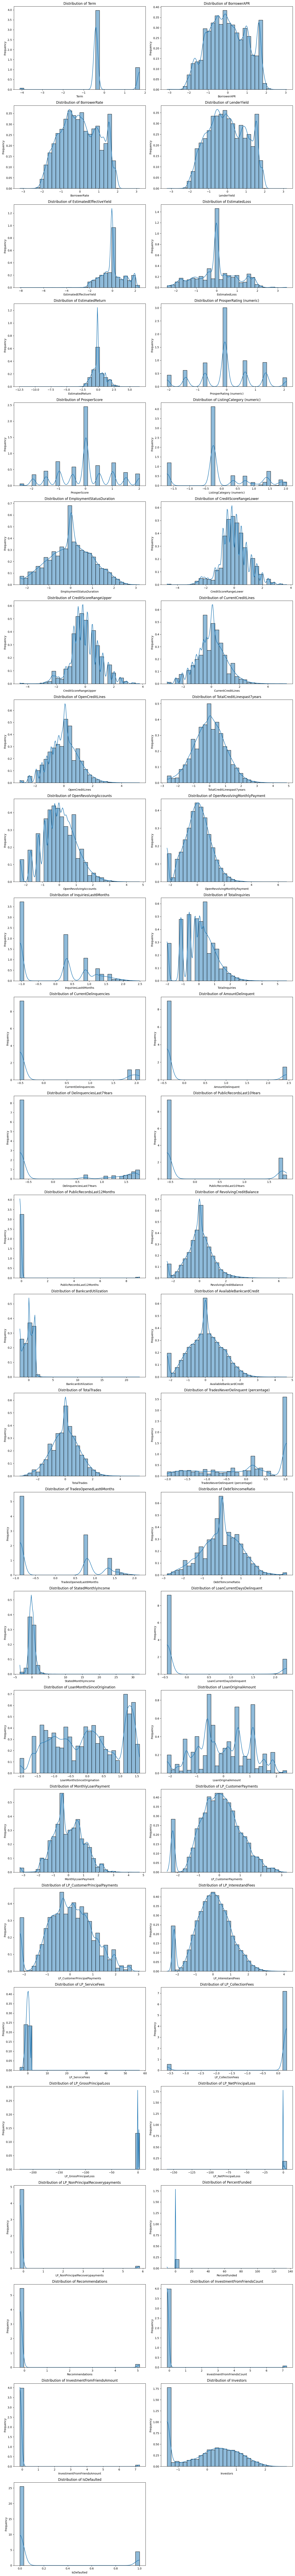

In [76]:
plot_numeric_distribution(data)

The numerical features are normally distributed.

# Dropping highly correlated features to handle "Multicollinearity".

In [77]:
data.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('bool'), dtype('int64')],
      dtype=object)

In [78]:
# Numerical features (Both continuous and discrete)

numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O' and data[feature].dtype != 'bool']
numerical_features

['Term',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'EmploymentStatusDuration',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'LoanCurrentDaysDelinquent',
 'LoanMonthsSinceOrigination',
 'LoanOriginalAmount',
 'MonthlyLoanPayment',
 'LP_CustomerPayments',
 'LP_CustomerPrincipalPayments',
 'LP_InterestandFees',
 'LP_ServiceFees

In [79]:
# Create a correlation matrix

correlation_matrix = data[numerical_features].corr()

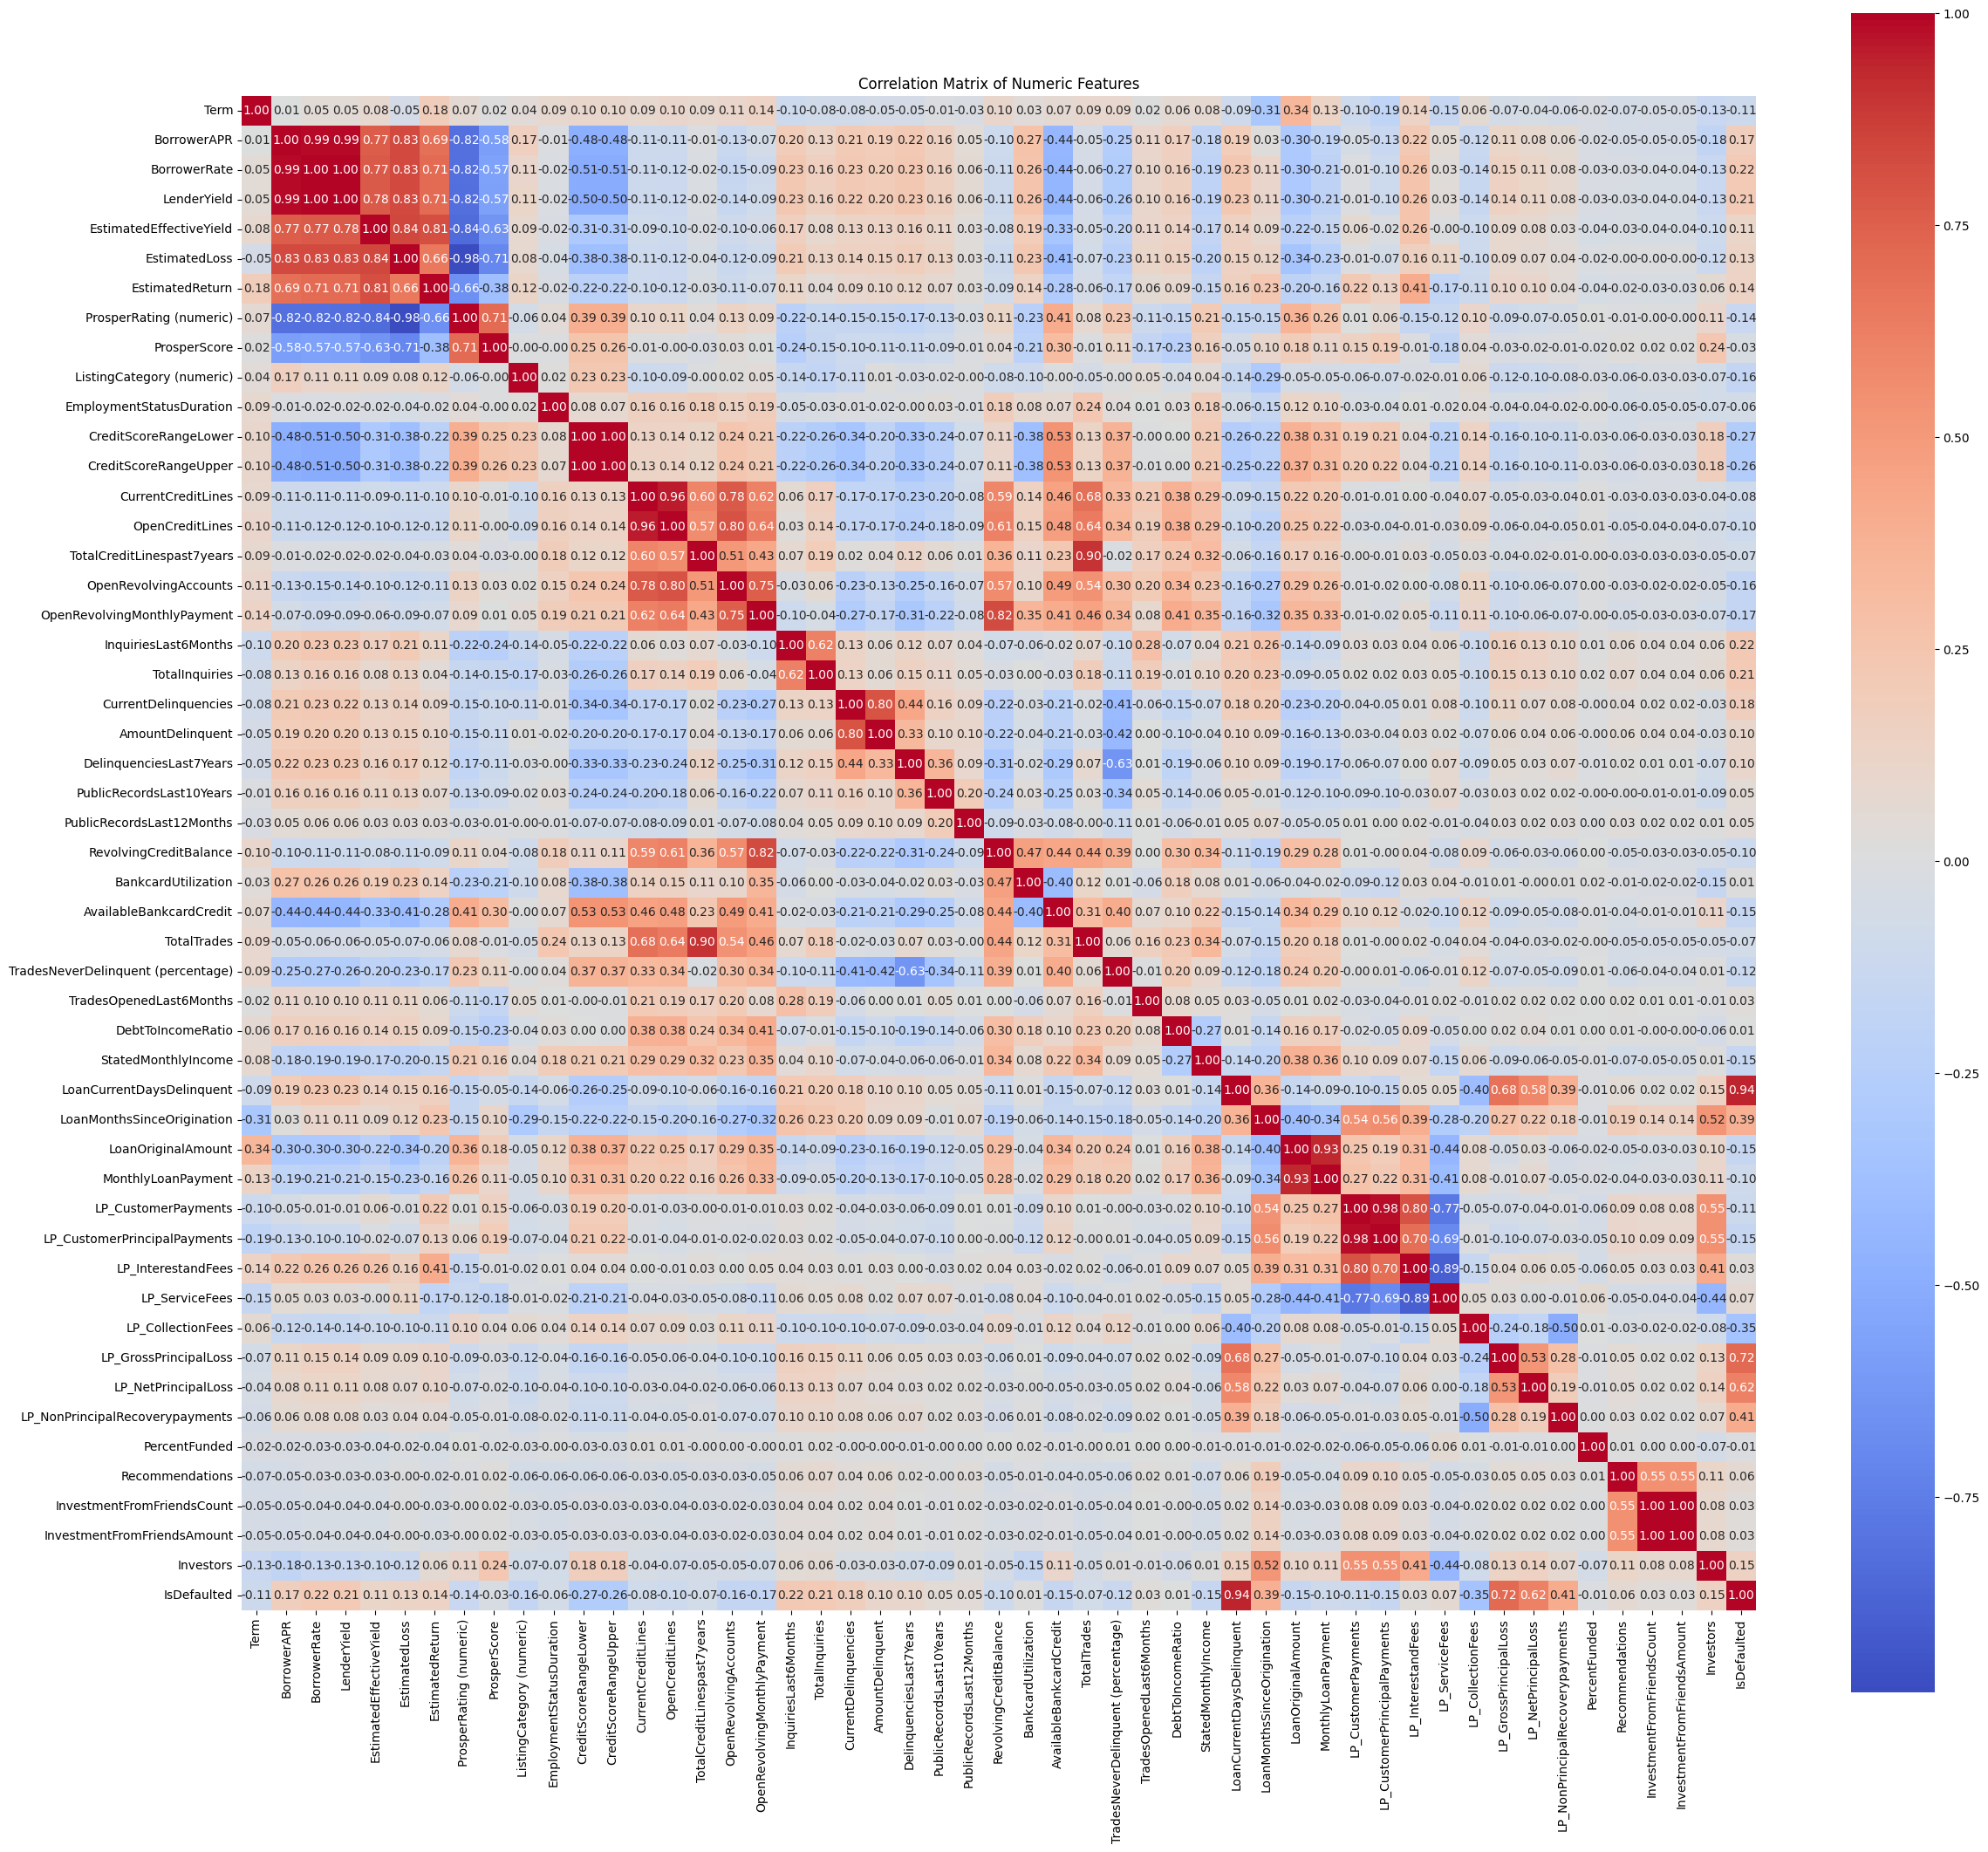

In [80]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(28, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True) # cbar_kws={"shrink": .8}
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [81]:
threshold = 0.75

# Find pairs of features that are highly correlated
high_corr_pairs = []

# Iterate over the matrix and identify pairs with high correlation
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Check for high correlation
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, corr_value))

# Convert to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])

# Display the list of highly correlated features
print("Highly correlated feature pairs:")
print(high_corr_df)

Highly correlated feature pairs:
                       Feature 1                    Feature 2  Correlation
0                   BorrowerRate                  BorrowerAPR     0.989469
1                    LenderYield                  BorrowerAPR     0.988842
2                    LenderYield                 BorrowerRate     0.999199
3        EstimatedEffectiveYield                  BorrowerAPR     0.766441
4        EstimatedEffectiveYield                 BorrowerRate     0.771368
5        EstimatedEffectiveYield                  LenderYield     0.775459
6                  EstimatedLoss                  BorrowerAPR     0.829988
7                  EstimatedLoss                 BorrowerRate     0.830301
8                  EstimatedLoss                  LenderYield     0.834452
9                  EstimatedLoss      EstimatedEffectiveYield     0.843196
10               EstimatedReturn      EstimatedEffectiveYield     0.814960
11       ProsperRating (numeric)                  BorrowerAPR    -0

1. From the above Heatmap, we can see many features that are highly correlated to each other.

2. BorrowerRate, BorrowerAPR, LenderYield are highly correlated with each other with a ratio of approximately 100%.

3. EstimatedEffectiveYield is highly correlated with BorrowerRate, BorrowerAPR, LenderYield with a ratio of approximately 77%.

4. EstimatedLoss is highly correlated with BorrowerRate, BorrowerAPR, LenderYield with a ratio of approximately 82%.                                 

5. EstimatedLoss and EstimatedEffectiveYield are highly correlated with each other with a ratio of approximately 80%.

6. EstimatedReturn and EstimatedEffectiveYield are highly correlated with each other with a ratio of approximately 80%.

7. ProsperRating (numeric) is highly correlated with BorrowerRate, BorrowerAPR, LenderYield with a ratio of approximately 82%. 

8. ProsperRating (numeric) is also highly correlated with EstimatedEffectiveYield with a ratio of approximately 85% and with EstimatedLoss with a ratio of approximately 96%.

9. There are also many features that are highly correlated with each other which leads to the problem of multicollinearity. 

10. LP_NetPrincipalLoss and LP_GrossPrincipalLoss are highly correlated with each other with a ratio of approximately 100%.

10. From the above headmap, we see that the dependent variable "IsDefault" is highly correlated with "LoanCurrentDaysDelinquent", LP_GrossPrincipalLoss and LP_NetPrincipalLoss. So, these features are very important.

In [82]:
# Removing the "IsDefault" feature from numerical_features list as it is the dependent feature.

numerical_features.remove('IsDefaulted')

In [83]:
numerical_features

['Term',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'EmploymentStatusDuration',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'LoanCurrentDaysDelinquent',
 'LoanMonthsSinceOrigination',
 'LoanOriginalAmount',
 'MonthlyLoanPayment',
 'LP_CustomerPayments',
 'LP_CustomerPrincipalPayments',
 'LP_InterestandFees',
 'LP_ServiceFees

In [84]:
# Performing correlation.

correlation_matrix = data[numerical_features].corr()

In [85]:
# Identify the features that are highly correlated.

num_df = data[numerical_features]

# Create an upper triangle matrix to avoid duplicate pairs
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Set a threshold value for dropping correlated features
threshold = 0.7

# Find the columns that have correlations above the threshold
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

print(to_drop)

# Drop the correlated features
reduced_df = num_df.drop(columns=to_drop)

# Show the remaining features
print("Dropped features:", to_drop)
print("Remaining features after dropping correlated ones:")
print(reduced_df.head())

['BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperScore', 'CreditScoreRangeUpper', 'OpenCreditLines', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'AmountDelinquent', 'RevolvingCreditBalance', 'TotalTrades', 'MonthlyLoanPayment', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'InvestmentFromFriendsAmount']
Dropped features: ['BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperScore', 'CreditScoreRangeUpper', 'OpenCreditLines', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'AmountDelinquent', 'RevolvingCreditBalance', 'TotalTrades', 'MonthlyLoanPayment', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'InvestmentFromFriendsAmount']
Remaining features after dropping correlated ones:
       Term  BorrowerAPR  ProsperRating (numeric)  ListingCategory (numeric)  \
0 -0.404987    -0.636705                -0.052591                  -1.700178   
1 -0.404987  

In [86]:
data.shape

(113937, 66)

In [87]:
# Dropping the highly correlated featured

data.drop(['BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperScore', 'CreditScoreRangeUpper', 'OpenCreditLines', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'AmountDelinquent', 'RevolvingCreditBalance', 'TotalTrades', 'MonthlyLoanPayment', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'InvestmentFromFriendsAmount'], axis = 1, inplace=True)

In [88]:
data.shape

(113937, 49)

In [89]:
data.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('bool'), dtype('int64')],
      dtype=object)

Displaying numerical features after dropping highly correlated features.

In [90]:
# Numerical features (Both continuous and discrete)

numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O' and data[feature].dtype != 'bool']
numerical_features

['Term',
 'BorrowerAPR',
 'ProsperRating (numeric)',
 'ListingCategory (numeric)',
 'EmploymentStatusDuration',
 'CreditScoreRangeLower',
 'CurrentCreditLines',
 'TotalCreditLinespast7years',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'LoanCurrentDaysDelinquent',
 'LoanMonthsSinceOrigination',
 'LoanOriginalAmount',
 'LP_CustomerPayments',
 'LP_ServiceFees',
 'LP_CollectionFees',
 'LP_GrossPrincipalLoss',
 'LP_NetPrincipalLoss',
 'LP_NonPrincipalRecoverypayments',
 'PercentFunded',
 'Recommendations',
 'InvestmentFromFriendsCount',
 'Investors',
 'IsDefaulted']

Handling dateTime features.

In [91]:
# Categorical features

cat_feat = [feature for feature in data.columns if feature not in numerical_features]
cat_feat

['ListingCreationDate',
 'CreditGrade',
 'ClosedDate',
 'ProsperRating (Alpha)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'DateCreditPulled',
 'FirstRecordedCreditLine',
 'IncomeRange',
 'IncomeVerifiable',
 'LoanOriginationDate',
 'LoanOriginationQuarter']

Getting all dateTime related features

In [92]:
date_features = data[['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate', 'LoanOriginationQuarter']]

In [93]:
date_features

ListingCreationDate           ClosedDate  \
0       2007-08-26 19:09:29.263000000  2009-08-14 00:00:00   
1       2014-02-27 08:28:07.900000000              Missing   
2       2007-01-05 15:00:47.090000000  2009-12-17 00:00:00   
3       2012-10-22 11:02:35.010000000              Missing   
4       2013-09-14 18:38:39.097000000              Missing   
...                               ...                  ...   
113932  2013-04-14 05:55:02.663000000              Missing   
113933  2011-11-03 20:42:55.333000000              Missing   
113934  2013-12-13 05:49:12.703000000              Missing   
113935  2011-11-14 13:18:26.597000000  2013-08-13 00:00:00   
113936  2014-01-15 09:27:37.657000000              Missing   

                     DateCreditPulled FirstRecordedCreditLine  \
0       2007-08-26 18:41:46.780000000     2001-10-11 00:00:00   
1                 2014-02-27 08:28:14     1996-03-18 00:00:00   
2       2007-01-02 14:09:10.060000000     2002-07-27 00:00:00   
3                 2012-10-22 11:02:32     1983-02-28 00:00:00   
4                 2013-09-14 18:38:44     2004-02-20 00:00:00   
...                               ...                     ...   
113932            2013-04-14 05:54:58     1997-09-01 00:00:00   
113933            2011-11-03 20:42:53     1992-01-17 00:00:00   
113934            2013-12-13 05:49:15     2002-02-25 00:00:00   
113935            2011-11-14 13:18:24     1993-12-01 00:00:00   
113936            2014-01-15 09:27:40     1995-01-01 00:00:00   

        LoanOriginationDate LoanOriginationQuarter  
0       2007-09-12 00:00:00                Q3 2007  
1       2014-03-03 00:00:00                Q1 2014  
2       2007-01-17 00:00:00                Q1 2007  
3       2012-11-01 00:00:00                Q4 2012  
4       2013-09-20 00:00:00                Q3 2013  
...                     ...                    ...  
113932  2013-04-22 00:00:00                Q2 2013  
113933  2011-11-07 00:00:00                Q4 2011  
113934  2013-12-23 00:00:00                Q4 2013  
113935  2011-11-21 00:00:00                Q4 2011  
113936  2014-01-21 00:00:00                Q1 2014  

[113937 rows x 6 columns]

In [94]:
data['ListingCreationDate'] = pd.to_datetime(data['ListingCreationDate'], format='mixed')

In [95]:
data['DateCreditPulled'] = pd.to_datetime(data['DateCreditPulled'], format='mixed')

In [96]:
data['LoanOriginationDate'] = pd.to_datetime(data['LoanOriginationDate'], format='mixed')

Checking for missing values in Date time columns

In [97]:
is_present = data['ListingCreationDate'].isin(["Missing"]).any()
print(is_present)

False


In [98]:
is_present = data['DateCreditPulled'].isin(["Missing"]).any()
print(is_present) 

False


In [99]:
is_present = data['ClosedDate'].isin(["Missing"]).any()
print(is_present) 

True


In [100]:
is_present = data['LoanOriginationDate'].isin(["Missing"]).any()
print(is_present)

False


In [101]:
is_present = data['FirstRecordedCreditLine'].isin(["Missing"]).any()
print(is_present)

True


The ClosedDate column contains missing features. This means that the loan is still active or haven't reached any of the specific statuses (Cancelled, Completed, Chargedoff, Defaulted). So, filling missing values of the 'ClosedDate' feature with the respective 'LoanOriginationDate' feature.

In [102]:
# Fill missing values in ClosedDate with LoanOriginationDate. 

data['ClosedDate'] = pd.to_datetime(data['ClosedDate'], errors='coerce')

# Replace "Missing" in ClosedDate with corresponding LoanOriginationDate
data.loc[data['ClosedDate'].isna(), 'ClosedDate'] = data['LoanOriginationDate']

In [103]:
# Dropping FirstRecordedCreditLine feature as I see no value during the analysis.

data.drop(['FirstRecordedCreditLine'], axis = 1, inplace = True)

In [104]:
# # Filling missing values in FirstRecordedCreditLine with median value.

# data['FirstRecordedCreditLine'] = pd.to_datetime(data['FirstRecordedCreditLine'], errors='coerce')

# median_date = data['FirstRecordedCreditLine'].median()

# data['FirstRecordedCreditLine'] = data['FirstRecordedCreditLine'].fillna(median_date, inplace=True)

In [105]:
date_features_new = data[['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'LoanOriginationDate', 'LoanOriginationQuarter']]
date_features_new.head(20)

ListingCreationDate ClosedDate        DateCreditPulled  \
0  2007-08-26 19:09:29.263 2009-08-14 2007-08-26 18:41:46.780   
1  2014-02-27 08:28:07.900 2014-03-03 2014-02-27 08:28:14.000   
2  2007-01-05 15:00:47.090 2009-12-17 2007-01-02 14:09:10.060   
3  2012-10-22 11:02:35.010 2012-11-01 2012-10-22 11:02:32.000   
4  2013-09-14 18:38:39.097 2013-09-20 2013-09-14 18:38:44.000   
5  2013-12-14 08:26:37.093 2013-12-24 2013-12-14 08:26:40.000   
6  2013-04-12 09:52:56.147 2013-04-18 2013-04-12 09:52:53.000   
7  2013-05-05 06:49:27.493 2013-05-13 2013-05-05 06:49:25.000   
8  2013-12-02 10:43:39.117 2013-12-12 2013-12-02 10:43:39.000   
9  2013-12-02 10:43:39.117 2013-12-12 2013-12-02 10:43:39.000   
10 2012-05-10 07:04:01.577 2012-05-17 2012-04-22 08:38:09.000   
11 2007-10-09 20:28:33.640 2008-01-07 2007-10-08 13:13:44.363   
12 2013-12-15 20:01:10.757 2014-01-07 2013-12-15 20:01:13.000   
13 2013-07-15 16:28:28.087 2013-07-18 2013-07-11 16:51:03.000   
14 2013-04-19 11:17:41.700 2013-05-13 2013-04-19 11:17:38.000   
15 2012-04-10 09:14:46.297 2012-12-19 2012-04-10 09:14:41.000   
16 2013-07-16 12:42:48.680 2013-07-18 2013-07-16 12:42:39.000   
17 2006-08-15 12:21:09.433 2008-05-22 2006-08-15 10:56:13.020   
18 2013-02-20 03:48:37.470 2013-03-11 2013-02-20 03:48:33.000   
19 2013-08-21 06:49:02.093 2013-10-10 2013-10-04 17:49:53.000   

   LoanOriginationDate LoanOriginationQuarter  
0           2007-09-12                Q3 2007  
1           2014-03-03                Q1 2014  
2           2007-01-17                Q1 2007  
3           2012-11-01                Q4 2012  
4           2013-09-20                Q3 2013  
5           2013-12-24                Q4 2013  
6           2013-04-18                Q2 2013  
7           2013-05-13                Q2 2013  
8           2013-12-12                Q4 2013  
9           2013-12-12                Q4 2013  
10          2012-05-17                Q2 2012  
11          2007-10-18                Q4 2007  
12          2014-01-07                Q1 2014  
13          2013-07-18                Q3 2013  
14          2013-05-13                Q2 2013  
15          2012-04-19                Q2 2012  
16          2013-07-18                Q3 2013  
17          2006-08-22                Q3 2006  
18          2013-03-11                Q1 2013  
19          2013-10-10                Q4 2013

In [106]:
data.shape

(113937, 48)

Extracting year, month, and day from date features.

In [107]:
# Extract year, month, and day from LoanOriginationYear.

data['LoanOriginationYear'] = data['LoanOriginationDate'].dt.year
data['LoanOriginationMonth'] = data['LoanOriginationDate'].dt.month
data['LoanOriginationDay'] = data['LoanOriginationDate'].dt.day

In [108]:
data.shape

(113937, 51)

In [109]:
# Extract year, month, and day from ClosedDate.

data['ClosedDateYear'] = data['ClosedDate'].dt.year
data['ClosedDateMonth'] = data['ClosedDate'].dt.month
data['ClosedDateDay'] = data['ClosedDate'].dt.day

In [110]:
data.shape

(113937, 54)

In [111]:
# Extract year, month, and day from ListingCreationDate.

data['ListingCreationYear'] = data['ListingCreationDate'].dt.year
data['ListingCreationMonth'] = data['ListingCreationDate'].dt.month
data['ListingCreationDay'] = data['ListingCreationDate'].dt.day

In [112]:
data.shape

(113937, 57)

In [113]:
# Extract year, month, and day from DateCreditPulled.

data['DateCreditPulledYear'] = data['DateCreditPulled'].dt.year
data['DateCreditPulledMonth'] = data['DateCreditPulled'].dt.month
data['DateCreditPulledDay'] = data['DateCreditPulled'].dt.day

In [114]:
data.shape

(113937, 60)

In [115]:
# Extract year, month, and day from LoanOriginationQuarter.

# Define a mapping from quarters to months
quarter_to_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}

# Convert 'LoanOriginationQuarter' to datetime
data['LoanOriginationQuarter'] = data['LoanOriginationQuarter'].apply(lambda x: pd.to_datetime(x.split()[1] + '-' + quarter_to_month[x.split()[0]] + '-01'))

# Display the dataframe
data.head()

ListingCreationDate CreditGrade      Term ClosedDate  BorrowerAPR  \
0 2007-08-26 19:09:29.263           C -0.404987 2009-08-14    -0.636705   
1 2014-02-27 08:28:07.900     Missing -0.404987 2014-03-03    -1.273070   
2 2007-01-05 15:00:47.090          HR -0.404987 2009-12-17     0.822597   
3 2012-10-22 11:02:35.010     Missing -0.404987 2012-11-01    -1.198204   
4 2013-09-14 18:38:39.097     Missing -0.404987 2013-09-20     0.397098   

   ProsperRating (numeric) ProsperRating (Alpha)  ListingCategory (numeric)  \
0                -0.052591               Missing                  -1.700178   
1                 1.363479                     A                   0.363967   
2                -0.052591               Missing                  -1.700178   
3                 1.363479                     A                   1.914073   
4                -0.740626                     D                   0.363967   

  BorrowerState     Occupation EmploymentStatus  EmploymentStatusDuration  \
0            CO          Other    Self-employed                 -1.941951   
1            CO   Professional         Employed                 -0.337095   
2            GA          Other    Not available                  0.025969   
3            GA  Skilled Labor         Employed                  0.540410   
4            MN      Executive         Employed                 -0.337095   

   IsBorrowerHomeowner  CurrentlyInGroup        DateCreditPulled  \
0                 True              True 2007-08-26 18:41:46.780   
1                False             False 2014-02-27 08:28:14.000   
2                False              True 2007-01-02 14:09:10.060   
3                 True             False 2012-10-22 11:02:32.000   
4                 True             False 2013-09-14 18:38:44.000   

   CreditScoreRangeLower  CurrentCreditLines  TotalCreditLinespast7years  \
0              -0.772424           -1.056998                   -1.155839   
1              -0.158783            0.782604                    0.297035   
2              -2.732519            0.079384                   -2.458568   
3               1.998034           -1.056998                    0.297035   
4              -0.158783            1.521886                    1.498106   

   InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  \
0              1.201341       -0.239210              2.022176   
1              1.201341        0.278702             -0.509351   
2             -1.044900       -1.124914              1.876457   
3             -1.044900       -1.124914              2.056313   
4              0.337495        0.930993             -0.509351   

   DelinquenciesLast7Years  PublicRecordsLast10Years  \
0                 1.369561                 -0.563129   
1                -0.673914                  1.761153   
2                -0.673914                 -0.563129   
3                 1.661563                 -0.563129   
4                -0.673914                 -0.563129   

   PublicRecordsLast12Months  BankcardUtilization  AvailableBankcardCredit  \
0                  -0.111213            -1.778348                -0.480651   
1                  -0.111213            -1.150402                 0.552257   
2                  -0.111213             0.092002                 0.010665   
3                  -0.111213            -1.661217                 1.341717   
4                  -0.111213             0.796545                -0.796112   

   TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  \
0                           -1.007455                -0.895144   
1                            1.033202                 1.330451   
2                            0.159427                -0.895144   
3                           -1.276542                -0.895144   
4                            0.287011                 1.330451   

   DebtToIncomeRatio     IncomeRange  IncomeVerifiable  StatedMonthlyIncome  \
0          -0.433715  $25,000-49,999              True            -0.591531   

In [116]:
data.shape

(113937, 60)

In [117]:
data['LoanOriginationQuarterYear'] = data['LoanOriginationQuarter'].dt.year
data['LoanOriginationQuarterMonth'] = data['LoanOriginationQuarter'].dt.month
data['LoanOriginationQuarterDay'] = data['LoanOriginationQuarter'].dt.day

In [118]:
data.shape

(113937, 63)

# Analysing trends and patterns of various features with respect to dateTime columns.

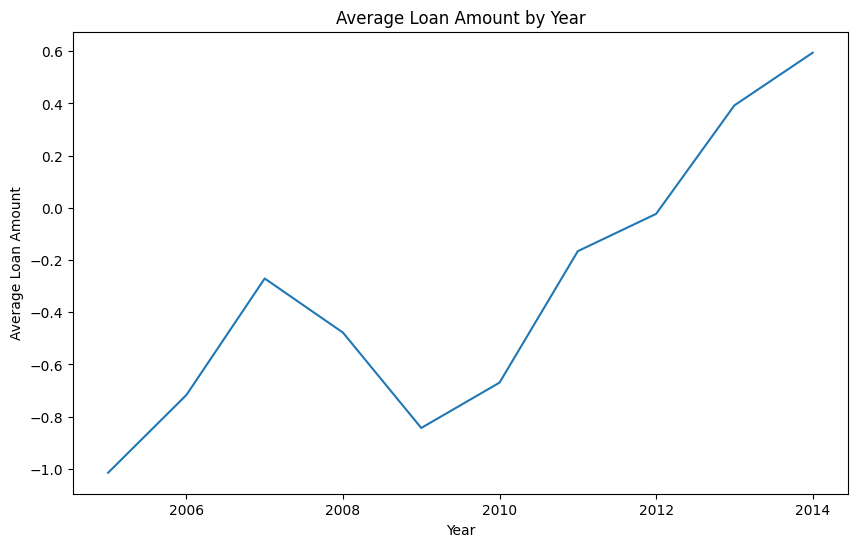

In [119]:
# Plot loan amount trends over time.

data.groupby('LoanOriginationYear')['LoanOriginalAmount'].mean().plot(kind='line', figsize=(10, 6))
plt.title('Average Loan Amount by Year')
plt.ylabel('Average Loan Amount')
plt.xlabel('Year')
plt.show()

We can see from the above trend line that the Loan amount continuously increasing as per time.

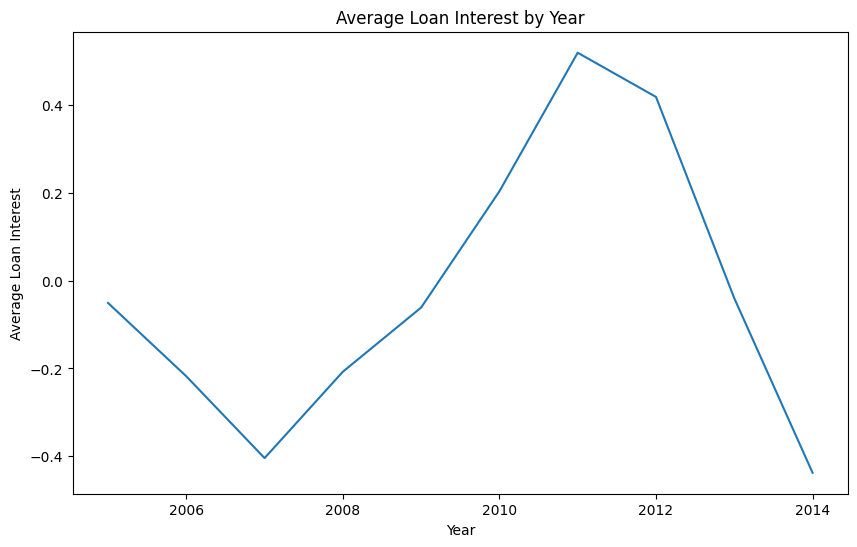

In [120]:
# Plotting Borrower's annual percentage rate (interest) for the loan taken over time.

data.groupby('LoanOriginationYear')['BorrowerAPR'].mean().plot(kind='line', figsize=(10, 6))
plt.title('Average Loan Interest by Year')
plt.ylabel('Average Loan Interest')
plt.xlabel('Year')
plt.show()

Upon comparing the Loan amount and Loan Interest trend lines, it can be deduced that the interest rate will be lesser for higher amount of loan and interest rate will be higher for less loan amount taken.

In [121]:
date_features.head()

ListingCreationDate           ClosedDate  \
0  2007-08-26 19:09:29.263000000  2009-08-14 00:00:00   
1  2014-02-27 08:28:07.900000000              Missing   
2  2007-01-05 15:00:47.090000000  2009-12-17 00:00:00   
3  2012-10-22 11:02:35.010000000              Missing   
4  2013-09-14 18:38:39.097000000              Missing   

                DateCreditPulled FirstRecordedCreditLine  LoanOriginationDate  \
0  2007-08-26 18:41:46.780000000     2001-10-11 00:00:00  2007-09-12 00:00:00   
1            2014-02-27 08:28:14     1996-03-18 00:00:00  2014-03-03 00:00:00   
2  2007-01-02 14:09:10.060000000     2002-07-27 00:00:00  2007-01-17 00:00:00   
3            2012-10-22 11:02:32     1983-02-28 00:00:00  2012-11-01 00:00:00   
4            2013-09-14 18:38:44     2004-02-20 00:00:00  2013-09-20 00:00:00   

  LoanOriginationQuarter  
0                Q3 2007  
1                Q1 2014  
2                Q1 2007  
3                Q4 2012  
4                Q3 2013

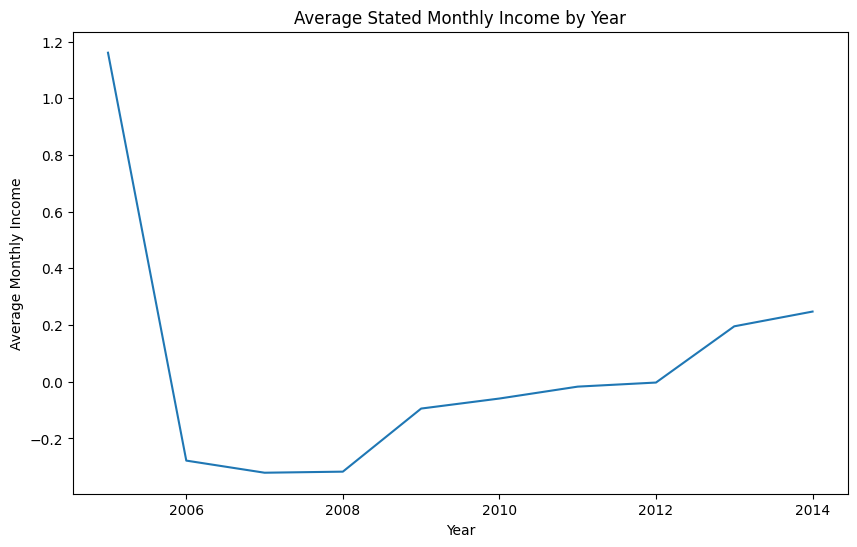

In [122]:
# Plotting Borrower's monthly income stated over time.

data.groupby('LoanOriginationYear')['StatedMonthlyIncome'].mean().plot(kind='line', figsize=(10, 6))
plt.title('Average Stated Monthly Income by Year')
plt.ylabel('Average Monthly Income')
plt.xlabel('Year')
plt.show()

We can see that the monthly income of the borrower was very high before 2006. The monthly income hit very low during the period of 2006 - 2008. We can see a steady rise in the borrower's income from 2008 to 2014.

# Feature Generation

1. Generating a new feature called "TimeToOrigination" which tells the time between ListingCreationDate and LoanOriginationDate that indicates how long it takes to approve loans.

In [123]:
# Calculate time between loan origination and listing creation

data['TimeToOrigination'] = (data['LoanOriginationDate'] - data['ListingCreationDate']).dt.days

In [124]:
data['TimeToOrigination']

0         16
1          3
2         11
3          9
4          5
          ..
113932     7
113933     3
113934     9
113935     6
113936     5
Name: TimeToOrigination, Length: 113937, dtype: int64

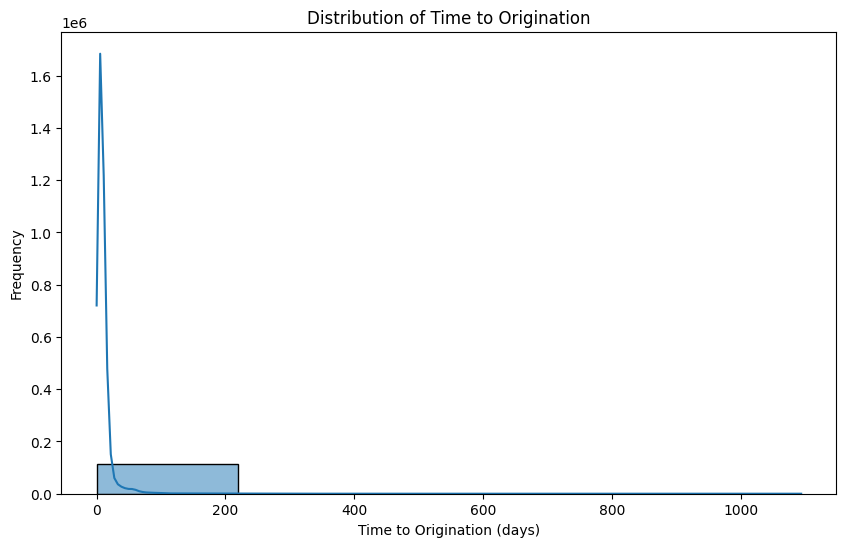

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(data['TimeToOrigination'], kde=True, bins=5)
plt.title('Distribution of Time to Origination')
plt.xlabel('Time to Origination (days)')
plt.ylabel('Frequency')
plt.show()

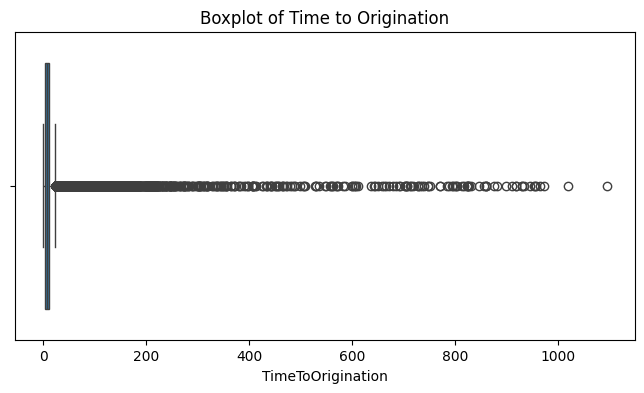

In [126]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['TimeToOrigination'])
plt.title('Boxplot of Time to Origination')
plt.show()

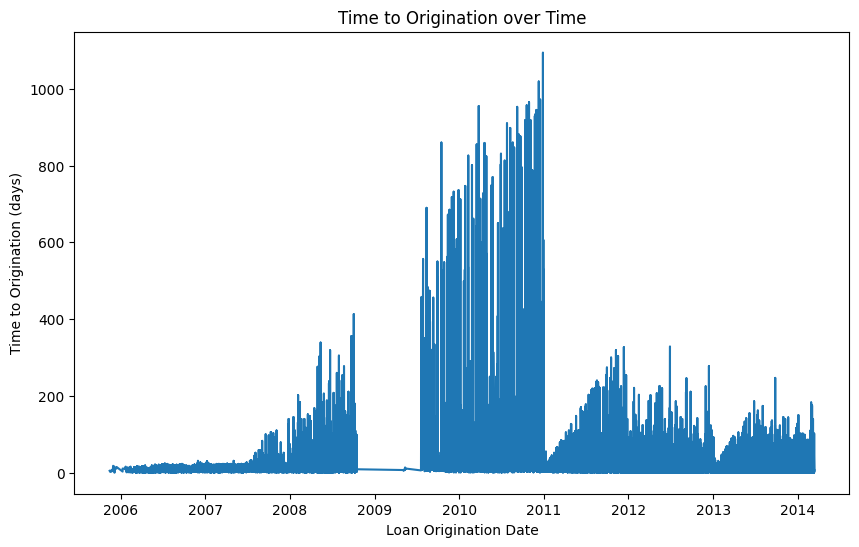

In [127]:
plt.figure(figsize=(10, 6))
data.sort_values('LoanOriginationDate', inplace=True)  # Ensure dates are sorted for plotting
plt.plot(data['LoanOriginationDate'], data['TimeToOrigination'])
plt.title('Time to Origination over Time')
plt.xlabel('Loan Origination Date')
plt.ylabel('Time to Origination (days)')
plt.show()

1. During the years 2006 until 2009, we see lesser loan approval periods. 
2. During the years 2010 and 2011, we see that the loan approval periods are very high.
3. Again from 2011 to 2014, we see an average time for the loan approval.

2. Calculate the time between Loan origination and Loan closure to understand the repayment duration.

In [128]:
data['LoanDurationForClosure'] = (data['ClosedDate'] - data['LoanOriginationDate']).dt.days

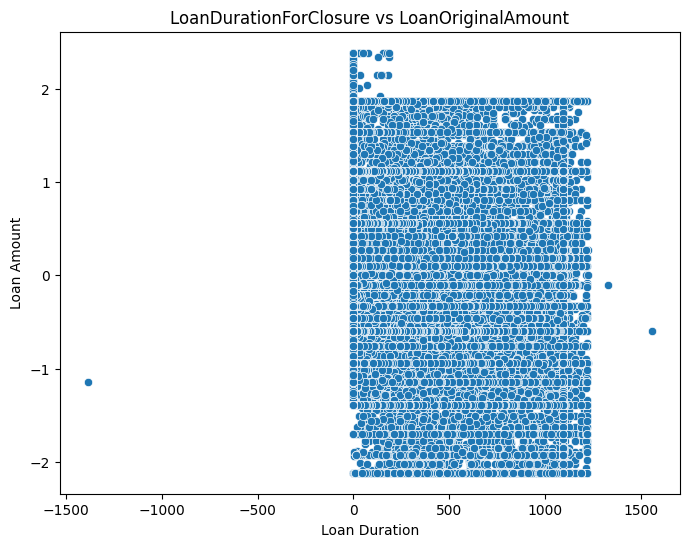

In [129]:
# Scatter plot between LoanDuration and a continuous LoanAmount.

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['LoanDurationForClosure'], y=data['LoanOriginalAmount'])
plt.title('LoanDurationForClosure vs LoanOriginalAmount')
plt.xlabel('Loan Duration')
plt.ylabel('Loan Amount')
plt.show()

The duration for repaying the loan amount is almost equally distributed and no special trend can be seen.

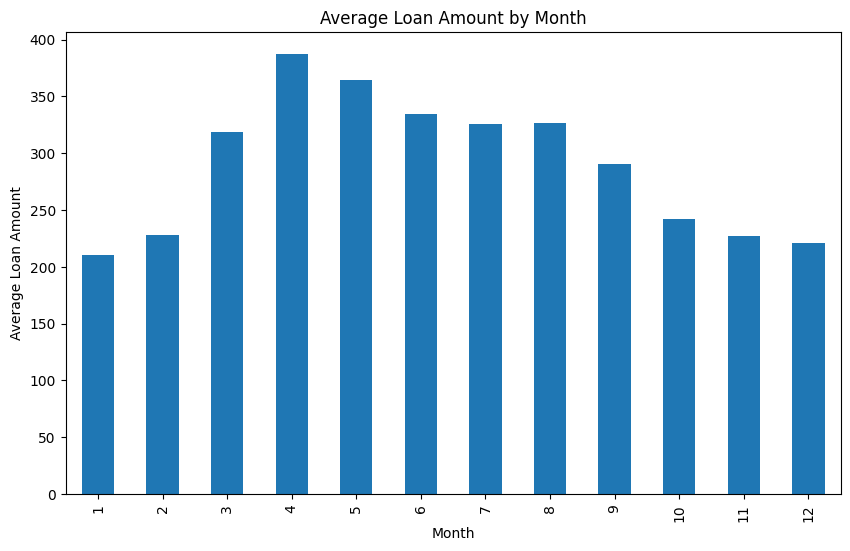

In [130]:
# Example: Loan amount by month to find seasonality
data.groupby('LoanOriginationMonth')['LoanDurationForClosure'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Loan Amount by Month')
plt.ylabel('Average Loan Amount')
plt.xlabel('Month')
plt.show()

Converting LoanOriginationQuarter from Object type to dateTime type.

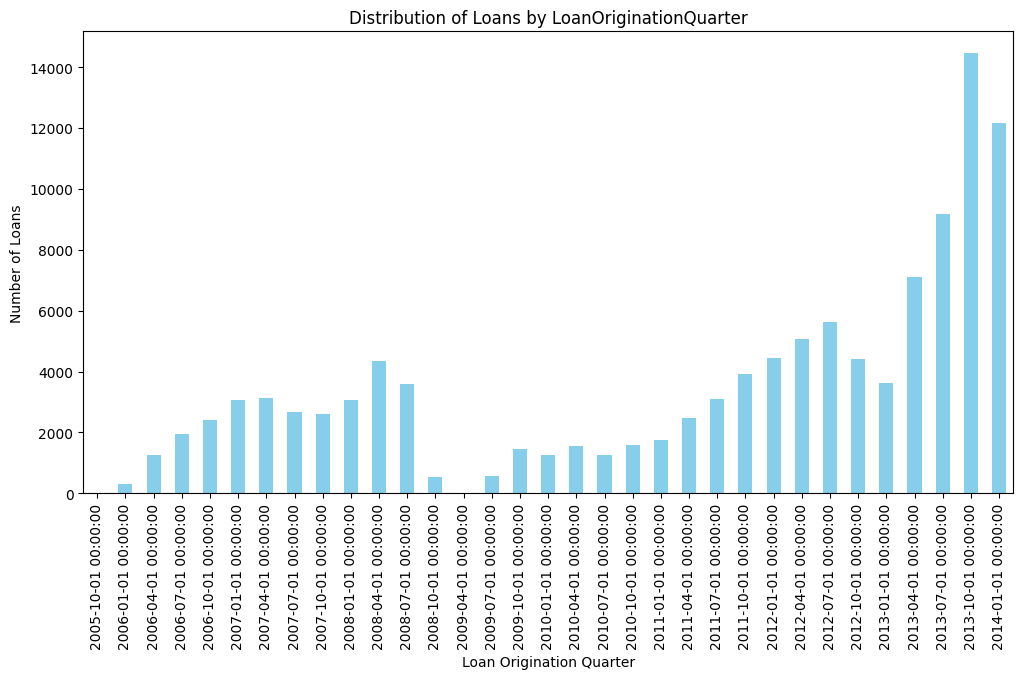

In [131]:
# Total number of loans originated with each quarter.

loan_quarter_counts = data['LoanOriginationQuarter'].value_counts().sort_index()

# Plot the distribution of loan originations over quarters
plt.figure(figsize=(12, 6))
loan_quarter_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Loans by LoanOriginationQuarter')
plt.xlabel('Loan Origination Quarter')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90)
plt.show()


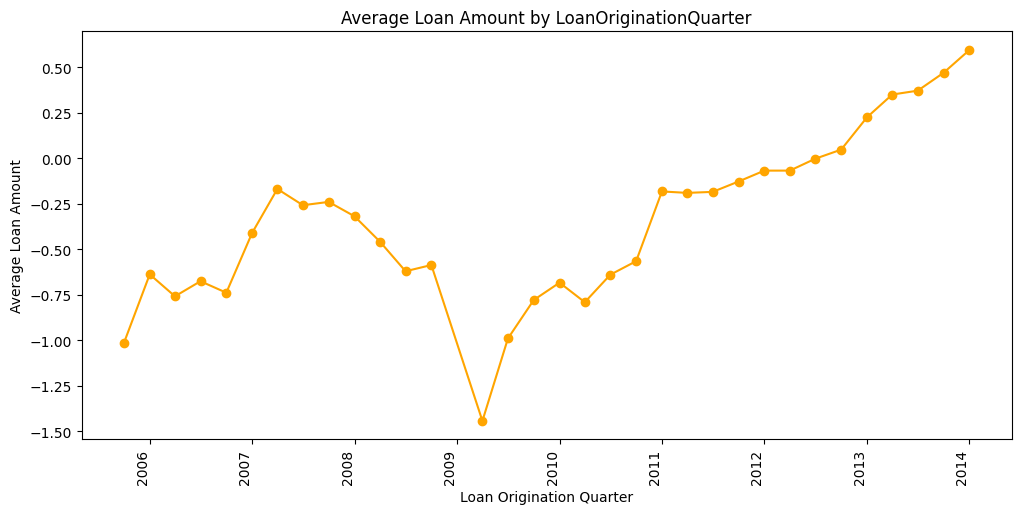

In [132]:
# Average loan amount by each quarter.

avg_loan_amount_by_quarter = data.groupby('LoanOriginationQuarter')['LoanOriginalAmount'].mean()

# Plot the average loan amount per quarter
plt.figure(figsize=(12, 6))
avg_loan_amount_by_quarter.plot(kind='line', marker='o', color='orange')
plt.title('Average Loan Amount by LoanOriginationQuarter')
plt.xlabel('Loan Origination Quarter')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=90)
plt.show()

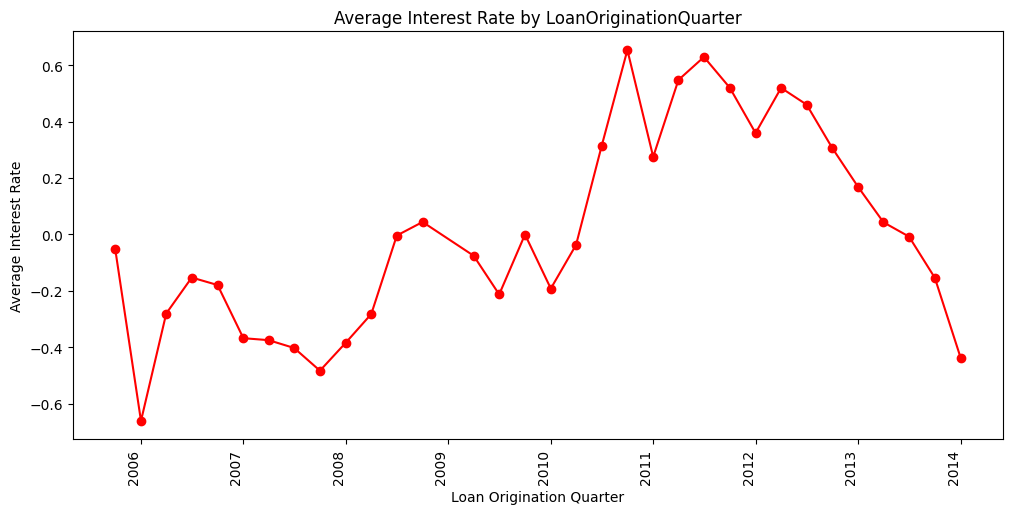

In [133]:
# InterestRate vs LoanOriginationQuarter.

avg_interest_rate_by_quarter = data.groupby('LoanOriginationQuarter')['BorrowerAPR'].mean()

# Plot the average interest rate per quarter
plt.figure(figsize=(12, 6))
avg_interest_rate_by_quarter.plot(kind='line', marker='o', color='red')
plt.title('Average Interest Rate by LoanOriginationQuarter')
plt.xlabel('Loan Origination Quarter')
plt.ylabel('Average Interest Rate')
plt.xticks(rotation=90)
plt.show()

In [134]:
data.shape

(113937, 65)

In [135]:
data.drop(['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'LoanOriginationDate', 'LoanOriginationQuarter'], axis = 1, inplace = True)

In [136]:
data.shape

(113937, 60)

In [137]:
data.head()

CreditGrade      Term  BorrowerAPR  ProsperRating (numeric)  \
113921          AA -0.404987    -0.050899                -0.052591   
62297            E -0.404987    -0.050899                -0.052591   
78414           AA -0.404987    -0.050899                -0.052591   
73945           HR -0.404987    -0.050899                -0.052591   
25166           AA -0.404987    -0.050899                -0.052591   

       ProsperRating (Alpha)  ListingCategory (numeric) BorrowerState  \
113921               Missing                  -1.700178       Missing   
62297                Missing                  -1.700178       Missing   
78414                Missing                  -1.700178       Missing   
73945                Missing                  -1.700178       Missing   
25166                Missing                  -1.700178       Missing   

       Occupation EmploymentStatus  EmploymentStatusDuration  \
113921    Missing          Missing                  0.025969   
62297     Missing          Missing                  0.025969   
78414     Missing          Missing                  0.025969   
73945     Missing          Missing                  0.025969   
25166     Missing          Missing                  0.025969   

        IsBorrowerHomeowner  CurrentlyInGroup  CreditScoreRangeLower  \
113921                False             False              -0.158783   
62297                 False             False              -0.158783   
78414                 False             False              -0.158783   
73945                 False             False              -0.158783   
25166                 False             False              -0.158783   

        CurrentCreditLines  TotalCreditLinespast7years  InquiriesLast6Months  \
113921            0.079384                    0.007664              0.337495   
62297             0.079384                    0.007664              0.337495   
78414             0.079384                    0.007664              0.337495   
73945             0.079384                    0.007664              0.337495   
25166             0.079384                    0.007664              0.337495   

        TotalInquiries  CurrentDelinquencies  DelinquenciesLast7Years  \
113921        0.045835             -0.509351                -0.673914   
62297         0.045835             -0.509351                -0.673914   
78414         0.045835             -0.509351                -0.673914   
73945         0.045835             -0.509351                -0.673914   
25166         0.045835             -0.509351                -0.673914   

        PublicRecordsLast10Years  PublicRecordsLast12Months  \
113921                 -0.563129                  -0.111213   
62297                  -0.563129                  -0.111213   
78414                  -0.563129                  -0.111213   
73945                  -0.563129                  -0.111213   
25166                  -0.563129                  -0.111213   

        BankcardUtilization  AvailableBankcardCredit  \
113921             0.092002                 0.010665   
62297              0.092002                 0.010665   
78414              0.092002                 0.010665   
73945              0.092002                 0.010665   
25166              0.092002                 0.010665   

        TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  \
113921                            0.159427                -0.895144   
62297                             0.159427                -0.895144   
78414                             0.159427                -0.895144   
73945                             0.159427                -0.895144   
25166                             0.159427                -0.895144   

        DebtToIncomeRatio    IncomeRange  IncomeVerifiable  \
113921           0.136048  Not displayed              True   
62297           -2.490801  Not displayed              True   
78414           -2.579962  Not displayed              True   
73945           -2

# Encoding and Feature scaling.

1. Performing scaling and encoding of numerical and categorical features respectively.

In [138]:
# The boolean features 'IsBorrowerHomeowner', 'CurrentlyInGroup' and 'IncomeVerifiable' contains True and False. Replacing True with 1 and False with 0.

data['IsBorrowerHomeowner'] = data['IsBorrowerHomeowner'].astype(int)
data['CurrentlyInGroup'] = data['CurrentlyInGroup'].astype(int)
data['IncomeVerifiable'] = data['IncomeVerifiable'].astype(int)

In [139]:
data.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64'), dtype('int32')],
      dtype=object)

In [140]:
data.shape

(113937, 60)

In [141]:
# Separating the target variable

target_df = data[['IsDefaulted']].copy()

print(type(target_df))
print(target_df.head())

<class 'pandas.core.frame.DataFrame'>
        IsDefaulted
113921            0
62297             0
78414             0
73945             0
25166             0


In [142]:
data.drop(['IsDefaulted'], axis=1, inplace = True)

In [143]:
data.shape

(113937, 59)

In [144]:
# Defining numerical and categorical features of the dataset.

numerical_features = data.select_dtypes(include=['int32', 'int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [145]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [146]:
# Standardizing the numerical features
scaler = StandardScaler()

In [147]:
# One-Hot Encoding for categorical features (since no clear ordering)
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity

In [148]:
# Using ColumnTransformer to apply scaling and encoding in one go

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),   # Apply standard scaling to numerical features
        ('cat', encoder, categorical_features)  # Apply one-hot encoding to categorical features
    ])

In [149]:
# Apply the transformations to the entire dataset

data_scaled_encoded = preprocessor.fit_transform(data)

In [150]:
data_scaled_encoded

array([[-0.40498726, -0.05089897, -0.05259063, ...,  0.        ,
         1.        ,  0.        ],
       [-0.40498726, -0.05089897, -0.05259063, ...,  0.        ,
         1.        ,  0.        ],
       [-0.40498726, -0.05089897, -0.05259063, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.40498726,  1.23091108, -1.41143444, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40498726, -0.98102467,  1.36347892, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40498726, -1.1118746 ,  1.36347892, ...,  0.        ,
         0.        ,  0.        ]])

In [151]:
# Converting the output back into a DataFrame
# We need to extract the new column names generated by OneHotEncoder
# OneHotEncoder categories (categorical column names)

encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

In [152]:
# Combining numerical column names with encoded column names

all_columns = list(numerical_features) + list(encoded_columns)

In [153]:
# Create a transformed DataFrame

data_transformed = pd.DataFrame(data_scaled_encoded, columns=all_columns)

In [154]:
data_transformed.head()

Term  BorrowerAPR  ProsperRating (numeric)  ListingCategory (numeric)  \
0 -0.404987    -0.050899                -0.052591                  -1.700178   
1 -0.404987    -0.050899                -0.052591                  -1.700178   
2 -0.404987    -0.050899                -0.052591                  -1.700178   
3 -0.404987    -0.050899                -0.052591                  -1.700178   
4 -0.404987    -0.050899                -0.052591                  -1.700178   

   EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
0                  0.025969            -1.008984         -0.354485   
1                  0.025969            -1.008984         -0.354485   
2                  0.025969            -1.008984         -0.354485   
3                  0.025969            -1.008984         -0.354485   
4                  0.025969            -1.008984         -0.354485   

   CreditScoreRangeLower  CurrentCreditLines  TotalCreditLinespast7years  \
0              -0.158783            0.079384                    0.007664   
1              -0.158783            0.079384                    0.007664   
2              -0.158783            0.079384                    0.007664   
3              -0.158783            0.079384                    0.007664   
4              -0.158783            0.079384                    0.007664   

   InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  \
0              0.337495        0.045835             -0.509351   
1              0.337495        0.045835             -0.509351   
2              0.337495        0.045835             -0.509351   
3              0.337495        0.045835             -0.509351   
4              0.337495        0.045835             -0.509351   

   DelinquenciesLast7Years  PublicRecordsLast10Years  \
0                -0.673914                 -0.563129   
1                -0.673914                 -0.563129   
2                -0.673914                 -0.563129   
3                -0.673914                 -0.563129   
4                -0.673914                 -0.563129   

   PublicRecordsLast12Months  BankcardUtilization  AvailableBankcardCredit  \
0                  -0.111213             0.092002                 0.010665   
1                  -0.111213             0.092002                 0.010665   
2                  -0.111213             0.092002                 0.010665   
3                  -0.111213             0.092002                 0.010665   
4                  -0.111213             0.092002                 0.010665   

   TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  \
0                            0.159427                -0.895144   
1                            0.159427                -0.895144   
2                            0.159427                -0.895144   
3                            0.159427                -0.895144   
4                            0.159427                -0.895144   

   DebtToIncomeRatio  IncomeVerifiable  StatedMonthlyIncome  \
0           0.136048           0.28697             1.621360   
1          -2.490801           0.28697             1.183988   
2          -2.579962           0.28697             0.853520   
3          -2.590000           0.28697             3.670968   
4          -2.092133           0.28697             1.023377   

   LoanCurrentDaysDelinquent  LoanMonthsSinceOrigination  LoanOriginalAmount  \
0                  -0.447962                     1.57777           -2.114598   
1                  -0.447962                     1.57777           -2.114598   
2                  -0.447962                     1.57777           -1.389136   
3                  -0.447962                     1.57777           -1.141627   
4                  -0.447962                     1.57777           -2.114598   

   LP_CustomerPayments  LP_ServiceFees  LP_CollectionFees  \
0            -0.618348        1.621463           0.277852   
1            -0.616631        1.707786           0.277852   
2          

In [155]:
data_transformed['IsDefault'] = target_df['IsDefaulted'].copy()

In [156]:
data_transformed['IsDefault'].value_counts()

IsDefault
0    96927
1    17010
Name: count, dtype: int64

The dataframe "data_transformed" contains Scaled and Encoded data.

In [157]:
data_transformed.head()

Term  BorrowerAPR  ProsperRating (numeric)  ListingCategory (numeric)  \
0 -0.404987    -0.050899                -0.052591                  -1.700178   
1 -0.404987    -0.050899                -0.052591                  -1.700178   
2 -0.404987    -0.050899                -0.052591                  -1.700178   
3 -0.404987    -0.050899                -0.052591                  -1.700178   
4 -0.404987    -0.050899                -0.052591                  -1.700178   

   EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
0                  0.025969            -1.008984         -0.354485   
1                  0.025969            -1.008984         -0.354485   
2                  0.025969            -1.008984         -0.354485   
3                  0.025969            -1.008984         -0.354485   
4                  0.025969            -1.008984         -0.354485   

   CreditScoreRangeLower  CurrentCreditLines  TotalCreditLinespast7years  \
0              -0.158783            0.079384                    0.007664   
1              -0.158783            0.079384                    0.007664   
2              -0.158783            0.079384                    0.007664   
3              -0.158783            0.079384                    0.007664   
4              -0.158783            0.079384                    0.007664   

   InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  \
0              0.337495        0.045835             -0.509351   
1              0.337495        0.045835             -0.509351   
2              0.337495        0.045835             -0.509351   
3              0.337495        0.045835             -0.509351   
4              0.337495        0.045835             -0.509351   

   DelinquenciesLast7Years  PublicRecordsLast10Years  \
0                -0.673914                 -0.563129   
1                -0.673914                 -0.563129   
2                -0.673914                 -0.563129   
3                -0.673914                 -0.563129   
4                -0.673914                 -0.563129   

   PublicRecordsLast12Months  BankcardUtilization  AvailableBankcardCredit  \
0                  -0.111213             0.092002                 0.010665   
1                  -0.111213             0.092002                 0.010665   
2                  -0.111213             0.092002                 0.010665   
3                  -0.111213             0.092002                 0.010665   
4                  -0.111213             0.092002                 0.010665   

   TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  \
0                            0.159427                -0.895144   
1                            0.159427                -0.895144   
2                            0.159427                -0.895144   
3                            0.159427                -0.895144   
4                            0.159427                -0.895144   

   DebtToIncomeRatio  IncomeVerifiable  StatedMonthlyIncome  \
0           0.136048           0.28697             1.621360   
1          -2.490801           0.28697             1.183988   
2          -2.579962           0.28697             0.853520   
3          -2.590000           0.28697             3.670968   
4          -2.092133           0.28697             1.023377   

   LoanCurrentDaysDelinquent  LoanMonthsSinceOrigination  LoanOriginalAmount  \
0                  -0.447962                     1.57777           -2.114598   
1                  -0.447962                     1.57777           -2.114598   
2                  -0.447962                     1.57777           -1.389136   
3                  -0.447962                     1.57777           -1.141627   
4                  -0.447962                     1.57777           -2.114598   

   LP_CustomerPayments  LP_ServiceFees  LP_CollectionFees  \
0            -0.618348        1.621463           0.277852   
1            -0.616631        1.707786           0.277852   
2          

# Feature Reduction.

In [158]:
# Separating dependent and independent variables.

X = data_transformed.drop('IsDefault', axis=1)
y = data_transformed['IsDefault'] 

# 1. Feature reduction using PCA.

In [159]:
from sklearn.decomposition import PCA

1. Using "Explained variance ratio" to identify the optimal number of components.

In [160]:
# Identifying the optimal number of dimensions to be reduced to using "Explained Variance Ratio".

# Fit PCA
pca = PCA().fit(X)  

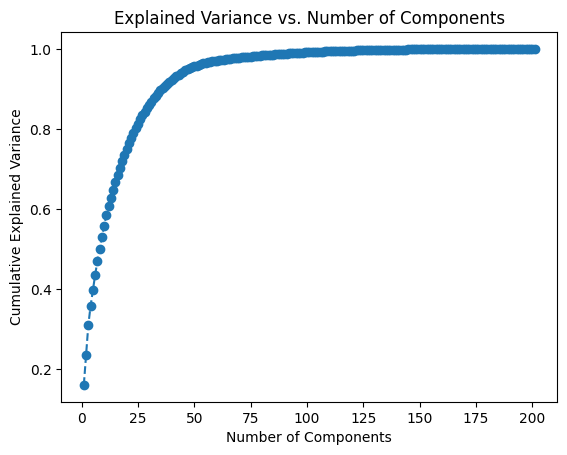

In [161]:
# Plot cumulative explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [162]:
# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find the number of components that explain at least 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components explaining 95% of variance: {n_components_95}")

Number of components explaining 95% of variance: 48


2. Using "Scree Plot" to identify the optimal number of components.

In [163]:
# # Plot the explained variance for each component
# plt.plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker='o', linestyle='--')
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance')
# plt.title('Scree Plot')
# plt.show()

3. Using "Kaiser Criterion (Eigenvalue > 1)" to identify the optimal number of components.

Taking only those number of features whose Eigen values are greater than 1.

In [164]:
# # Calculate eigenvalues (which are the explained variances)
# eigenvalues = pca.explained_variance_

# # Select components with eigenvalues > 1
# num_components = sum(eigenvalues > 1)
# print(f'Number of components to retain: {num_components}')

In [165]:
# Apply PCA with selected components

pca = PCA(n_components = n_components_95)

X_pca = pca.fit_transform(X)

In [166]:
X_pca

array([[-4.70680877, -1.094433  ,  2.49623328, ...,  0.19877384,
        -0.27618136,  0.38343831],
       [-4.88210429, -0.93439899,  2.501381  , ...,  0.10490934,
        -0.2786652 ,  0.32499407],
       [-4.71224608, -1.04427303,  1.51749029, ...,  0.08115085,
        -0.24924405,  0.26195785],
       ...,
       [ 3.56688362,  4.22989983, -1.41478664, ..., -0.32765102,
        -0.11525052, -0.41760479],
       [ 3.2284961 ,  3.46865052, -1.7605092 , ..., -0.24468749,
         0.01749732, -0.19662424],
       [ 4.39489934,  0.47217822, -2.46059679, ..., -0.15281427,
        -0.26004343, -0.11031669]])

In [167]:
# Convert to DataFrame for easier analysis.

data_PCA = pd.DataFrame(data = X_pca)

print(data_PCA.head())

         0         1         2         3         4         5         6   \
0 -4.706809 -1.094433  2.496233 -0.362817 -0.499797  3.829523  0.213350   
1 -4.882104 -0.934399  2.501381 -0.975593 -0.090226  3.620128 -0.608050   
2 -4.712246 -1.044273  1.517490 -1.034470  0.074439  3.504579 -0.467942   
3 -4.441677 -1.511336  1.468398 -0.427000  0.891649  3.425629 -0.964134   
4 -4.916141 -1.028861  2.476683 -0.970722 -0.195478  3.378187 -0.359313   

         7         8         9         10        11        12        13  \
0  0.218593  2.109304  0.890562 -0.885418 -0.334612  0.972455  0.213045   
1  1.097533  2.490899  0.834180 -1.088274 -0.160937  1.856429  0.395918   
2  1.177105  0.774648  0.930322 -1.197431 -0.066845  1.681004  0.391253   
3  1.119324  0.507809  1.249797 -1.344652  0.076255  2.826696  0.585576   
4  1.577228  2.518372  0.901137 -0.998422 -0.228792  1.621860  0.401340   

         14        15        16        17        18        19        20  \
0 -0.009345 -0.373160 -

In [168]:
# Combine data_pca with y (target variable).

final_dataset_pca = pd.concat([data_PCA, y.reset_index(drop=True)], axis=1)
final_dataset_pca.head()

0         1         2         3         4         5         6  \
0 -4.706809 -1.094433  2.496233 -0.362817 -0.499797  3.829523  0.213350   
1 -4.882104 -0.934399  2.501381 -0.975593 -0.090226  3.620128 -0.608050   
2 -4.712246 -1.044273  1.517490 -1.034470  0.074439  3.504579 -0.467942   
3 -4.441677 -1.511336  1.468398 -0.427000  0.891649  3.425629 -0.964134   
4 -4.916141 -1.028861  2.476683 -0.970722 -0.195478  3.378187 -0.359313   

          7         8         9        10        11        12        13  \
0  0.218593  2.109304  0.890562 -0.885418 -0.334612  0.972455  0.213045   
1  1.097533  2.490899  0.834180 -1.088274 -0.160937  1.856429  0.395918   
2  1.177105  0.774648  0.930322 -1.197431 -0.066845  1.681004  0.391253   
3  1.119324  0.507809  1.249797 -1.344652  0.076255  2.826696  0.585576   
4  1.577228  2.518372  0.901137 -0.998422 -0.228792  1.621860  0.401340   

         14        15        16        17        18        19        20  \
0 -0.009345 -0.373160 -0.731256 -0.372493  0.158566  0.301902 -0.175000   
1 -0.091526 -0.656496 -1.088307 -0.198786  0.218385  0.164410  0.126977   
2 -0.141805 -0.610023 -1.098521 -0.009837  0.213835 -0.012093 -0.036070   
3 -0.228336 -0.796095 -1.424248  0.265025 -0.405372 -0.162921 -0.579558   
4 -0.069044 -0.458170 -0.998119 -0.156384  0.263973  0.182604  0.137760   

         21        22        23        24        25        26        27  \
0  1.893946 -1.279091 -1.521203 -1.113902  1.225093 -1.080425  0.481173   
1  2.454340 -1.158186 -1.660651 -0.926855  1.039588 -0.920686  0.499718   
2  2.163918 -1.116235 -1.068950 -1.399741 -1.068264 -1.382668  1.428929   
3  2.839551 -1.021711 -1.438695 -1.378266 -1.221324 -1.578915  1.152563   
4  2.278611 -1.178846 -1.659648 -0.944262  1.103715 -0.967386  0.680224   

         28        29        30        31        32        33        34  \
0 -0.080917  0.214084  0.173715 -1.442236 -0.365529 -1.085036  0.262848   
1 -0.218106  0.138564  0.138635 -1.130312  0.519002 -0.520627 -0.594801   
2 -0.307134  0.158806  0.169110 -1.784694  0.789593 -0.545495 -0.733605   
3 -0.089374  0.189929  0.319693 -1.917865 -0.037478 -0.955701 -0.316632   
4 -0.254762  0.120280  0.112018 -0.997211  0.433039 -0.582481 -0.425805   

         35        36        37        38        39        40        41  \
0  0.107818  0.108486 -0.794274 -0.180991  0.411095 -0.285764 -1.039396   
1 -0.283545 -0.118868 -1.097546  0.212417 -0.160122 -0.098366 -0.149562   
2 -0.224511 -0.558041  0.792322  0.249197  0.108851  0.093960  0.020043   
3  0.104372 -0.156677  1.107970  0.271766  0.557735 -0.213902 -0.719673   
4 -0.217437 -0.256954 -0.527770 -0.138503 -0.014814 -0.074901 -0.160804   

         42        43        44        45        46        47  IsDefault  
0 -0.751674 -0.244332  0.127903  0.198774 -0.276181  0.383438          0  
1 -0.266478 -0.157499 -0.027493  0.104909 -0.278665  0.324994          0  
2  0.573901  0.016129 -0.113439  0.081151 -0.249244  0.261958          0  
3  0.198398 -0.013126  0.223119 -0.125232 -0.248060  0.355335          0  
4 -0.261527 -0.117675 -0.041364  0.125419 -0.240637  0.284095          0

In [169]:
final_dataset_pca.shape

(113937, 49)

In [170]:
#final_dataset_pca.to_csv('EDA_PCA_dataset.csv', index = False)

# 2. Feature selection using Mutual Information.

In [171]:
from sklearn.feature_selection import mutual_info_classif

# determine the mutual information
mutual_info = mutual_info_classif(X, y)
mutual_info

array([3.38005133e-03, 0.00000000e+00, 3.20143666e-03, 2.48143721e-03,
       5.24044991e-04, 9.43485166e-03, 4.74611992e-03, 1.32277069e-03,
       4.29463555e-04, 1.27571161e-03, 6.73267001e-03, 2.66530058e-03,
       8.81973580e-03, 6.24467979e-03, 7.04565799e-03, 1.83141928e-03,
       2.37355574e-04, 1.55405312e-04, 2.09515314e-03, 7.63109765e-03,
       0.00000000e+00, 5.16237318e-03, 0.00000000e+00, 5.42035227e-03,
       9.27378493e-04, 0.00000000e+00, 1.72752776e-04, 2.89769810e-04,
       5.58707870e-03, 5.10197203e-03, 4.54850724e-03, 4.39482804e-03,
       1.48352033e-03, 3.61125448e-03, 2.23187719e-03, 1.93070492e-03,
       4.14675721e-03, 1.48689300e-03, 0.00000000e+00, 1.29875838e-03,
       9.30720199e-05, 0.00000000e+00, 2.02028947e-03, 1.76214998e-03,
       2.17814792e-03, 3.25432249e-03, 0.00000000e+00, 2.72453287e-04,
       4.59581466e-03, 4.12474426e-03, 0.00000000e+00, 5.50069282e-04,
       3.29539422e-03, 1.36312144e-03, 0.00000000e+00, 0.00000000e+00,
      

In [172]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

CreditGrade_Missing              0.018135
IsBorrowerHomeowner              0.009435
CurrentDelinquencies             0.008820
TradesOpenedLast6Months          0.007631
PublicRecordsLast10Years         0.007046
                                   ...   
EmploymentStatus_Not employed    0.000000
EmploymentStatus_Missing         0.000000
Occupation_Waiter/Waitress       0.000000
EmploymentStatus_Other           0.000000
IncomeRange_Not displayed        0.000000
Length: 201, dtype: float64

In [173]:
type(mutual_info)

pandas.core.series.Series

<Axes: >

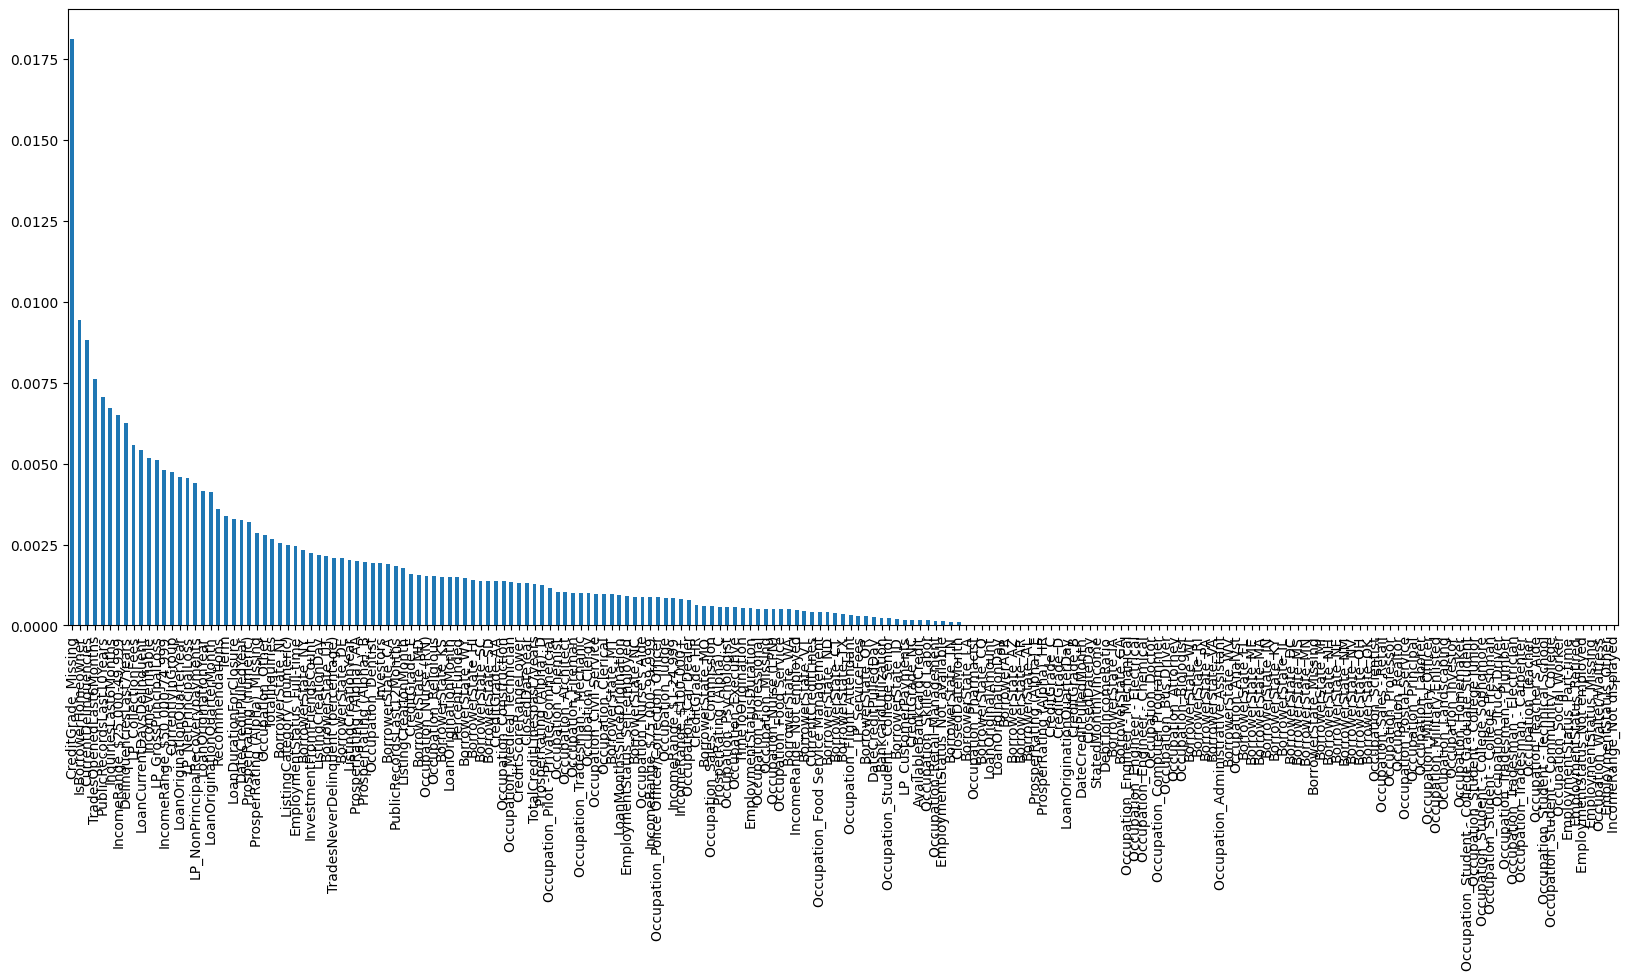

In [174]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [175]:
from sklearn.feature_selection import SelectPercentile

In [176]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_classif, percentile=20)
selected_top_columns.fit(X.fillna(0), y)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_classif at 0x000001E4A69111C0>)

In [177]:
# Get the selected features

X_selected = selected_top_columns.transform(X)

In [178]:
X_selected

array([[-0.40498726, -1.00898389, -0.35448479, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40498726, -1.00898389, -0.35448479, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40498726, -1.00898389, -0.35448479, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.40498726, -1.00898389, -0.35448479, ...,  0.        ,
         1.        ,  0.        ],
       [-0.40498726,  0.9910961 , -0.35448479, ...,  0.        ,
         0.        ,  1.        ],
       [-0.40498726,  0.9910961 , -0.35448479, ...,  0.        ,
         0.        ,  0.        ]])

In [179]:
selected_top_columns.get_support()

array([ True, False, False, False, False,  True,  True, False, False,
       False,  True, False,  True,  True,  True,  True, False, False,
        True,  True, False,  True, False,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [180]:
X.columns[selected_top_columns.get_support()]

Index(['Term', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'InquiriesLast6Months', 'CurrentDelinquencies',
       'DelinquenciesLast7Years', 'PublicRecordsLast10Years',
       'PublicRecordsLast12Months', 'TradesNeverDelinquent (percentage)',
       'TradesOpenedLast6Months', 'IncomeVerifiable',
       'LoanCurrentDaysDelinquent', 'LP_CollectionFees',
       'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
       'InvestmentFromFriendsCount', 'LoanOriginationYear',
       'LoanOriginationMonth', 'ClosedDateYear', 'ClosedDateMonth',
       'DateCreditPulledYear', 'LoanOriginationQuarterMonth',
       'LoanDurationForClosure', 'CreditGrade_C', 'CreditGrade_Missing',
       'ProsperRating (Alpha)_C', 'ProsperRating (Alpha)_Missing',
       'BorrowerState_CA', 'BorrowerState_CO', 'BorrowerState_OK',
       'BorrowerState_TX', 'Occupation_Administrative Assistant',
       'Occupation_Other', 'Occupation_Stude

In [181]:
# Convert back to DataFrame

selected_columns = X.columns[selected_top_columns.get_support()]

X_selected_df = pd.DataFrame(X_selected, columns=selected_columns)

In [182]:
X_selected_df

Term  IsBorrowerHomeowner  CurrentlyInGroup  InquiriesLast6Months  \
0      -0.404987            -1.008984         -0.354485              0.337495   
1      -0.404987            -1.008984         -0.354485              0.337495   
2      -0.404987            -1.008984         -0.354485              0.337495   
3      -0.404987            -1.008984         -0.354485              0.337495   
4      -0.404987            -1.008984         -0.354485              0.337495   
...          ...                  ...               ...                   ...   
113932  1.717817            -1.008984         -0.354485             -1.044900   
113933 -0.404987            -1.008984         -0.354485             -1.044900   
113934 -0.404987            -1.008984         -0.354485             -1.044900   
113935 -0.404987             0.991096         -0.354485              0.337495   
113936 -0.404987             0.991096         -0.354485             -1.044900   

        CurrentDelinquencies  DelinquenciesLast7Years  \
0                  -0.509351                -0.673914   
1                  -0.509351                -0.673914   
2                  -0.509351                -0.673914   
3                  -0.509351                -0.673914   
4                  -0.509351                -0.673914   
...                      ...                      ...   
113932             -0.509351                -0.673914   
113933             -0.509351                -0.673914   
113934             -0.509351                -0.673914   
113935              1.876457                 1.498534   
113936             -0.509351                -0.673914   

        PublicRecordsLast10Years  PublicRecordsLast12Months  \
0                      -0.563129                  -0.111213   
1                      -0.563129                  -0.111213   
2                      -0.563129                  -0.111213   
3                      -0.563129                  -0.111213   
4                      -0.563129                  -0.111213   
...                          ...                        ...   
113932                 -0.563129                  -0.111213   
113933                  1.761153                  -0.111213   
113934                 -0.563129                  -0.111213   
113935                  1.841761                  -0.111213   
113936                 -0.563129                  -0.111213   

        TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  \
0                                 0.159427                -0.895144   
1                                 0.159427                -0.895144   
2                                 0.159427                -0.895144   
3                                 0.159427                -0.895144   
4                                 0.159427                -0.895144   
...                                    ...                      ...   
113932                            1.033202                 1.330451   
113933                            1.033202                -0.895144   
113934                           -0.480270                 1.330451   
113935                            1.033202                 0.806129   
113936                            1.033202                -0.895144   

        IncomeVerifiable  LoanCurrentDaysDelinquent  LP_CollectionFees  \
0               0.286970                  -0.447962           0.277852   
1               0.286970                  -0.447962           0.277852   
2               0.286970                  -0.447962           0.277852   
3               0.286970                  -0.447962           0.277852   
4               0.286970                  -0.447962           0.277852   
...                  ...                        ...                ...   
113932          0.286970                  -0.447962           0.277852   
113933         -3.484686                  -0.447962           0.277852   
113934         -3.484686                  -0.447962           0.277852   
1139

In [183]:
# Combine X_selected_df with y (target variable).

final_dataset_MI = pd.concat([X_selected_df, y.reset_index(drop=True)], axis=1)
final_dataset_MI.head()

Term  IsBorrowerHomeowner  CurrentlyInGroup  InquiriesLast6Months  \
0 -0.404987            -1.008984         -0.354485              0.337495   
1 -0.404987            -1.008984         -0.354485              0.337495   
2 -0.404987            -1.008984         -0.354485              0.337495   
3 -0.404987            -1.008984         -0.354485              0.337495   
4 -0.404987            -1.008984         -0.354485              0.337495   

   CurrentDelinquencies  DelinquenciesLast7Years  PublicRecordsLast10Years  \
0             -0.509351                -0.673914                 -0.563129   
1             -0.509351                -0.673914                 -0.563129   
2             -0.509351                -0.673914                 -0.563129   
3             -0.509351                -0.673914                 -0.563129   
4             -0.509351                -0.673914                 -0.563129   

   PublicRecordsLast12Months  TradesNeverDelinquent (percentage)  \
0                  -0.111213                            0.159427   
1                  -0.111213                            0.159427   
2                  -0.111213                            0.159427   
3                  -0.111213                            0.159427   
4                  -0.111213                            0.159427   

   TradesOpenedLast6Months  IncomeVerifiable  LoanCurrentDaysDelinquent  \
0                -0.895144           0.28697                  -0.447962   
1                -0.895144           0.28697                  -0.447962   
2                -0.895144           0.28697                  -0.447962   
3                -0.895144           0.28697                  -0.447962   
4                -0.895144           0.28697                  -0.447962   

   LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0           0.277852              -0.300062            -0.259434   
1           0.277852              -0.300062            -0.259434   
2           0.277852              -0.300062            -0.259434   
3           0.277852              -0.300062            -0.259434   
4           0.277852              -0.300062            -0.259434   

   LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
0                        -0.171621        0.07346        -0.197058   
1                        -0.171621        0.07346        -0.197058   
2                        -0.171621        0.07346        -0.197058   
3                        -0.171621        0.07346        -0.197058   
4                        -0.171621        0.07346        -0.197058   

   InvestmentFromFriendsCount  LoanOriginationYear  LoanOriginationMonth  \
0                   -0.138057            -2.410658              1.235732   
1                   -0.138057            -2.410658              1.235732   
2                   -0.138057            -2.410658              1.235732   
3                   -0.138057            -2.410658              1.235732   
4                   -0.138057            -2.410658              1.235732   

   ClosedDateYear  ClosedDateMonth  DateCreditPulledYear  \
0       -3.621064         1.221983             -2.398311   
1       -3.621064         1.221983             -2.398311   
2       -3.090666        -1.502107             -2.398311   
3       -3.090666        -1.502107             -2.398311   
4       -3.621064         1.221983             -2.398311   

   LoanOriginationQuarterMonth  LoanDurationForClosure  CreditGrade_C  \
0                     1.274029               -0.715232            0.0   
1                     1.274029               -0.710007            0.0   
2                     1.274029               -0.615957            0.0   
3                     1.274029               -0.623795            0.0   
4                     1.274029               -0.725682            0.0   

   CreditGrade_Missing  ProsperRating (Alpha)_C  \
0                  0.0                      0.0   
1                  0.0          

In [184]:
final_dataset_MI.shape

(113937, 41)

In [185]:
final_dataset_MI['IsDefault'].value_counts()

IsDefault
0    96927
1    17010
Name: count, dtype: int64

In [186]:
# Save the new dataset with selected features to a file (CSV or any format)
#final_dataset_MI.to_csv('EDA_MI_dataset.csv', index=False)

In [187]:
print(f"Selected features saved to file. Number of selected features: {len(selected_columns)}")

Selected features saved to file. Number of selected features: 40


##### Training LIGHTGBM Algorithm with Feature Selected by Mutual Info

In [188]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [189]:
final_dataset_MI.columns

Index(['Term', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'InquiriesLast6Months', 'CurrentDelinquencies',
       'DelinquenciesLast7Years', 'PublicRecordsLast10Years',
       'PublicRecordsLast12Months', 'TradesNeverDelinquent (percentage)',
       'TradesOpenedLast6Months', 'IncomeVerifiable',
       'LoanCurrentDaysDelinquent', 'LP_CollectionFees',
       'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
       'InvestmentFromFriendsCount', 'LoanOriginationYear',
       'LoanOriginationMonth', 'ClosedDateYear', 'ClosedDateMonth',
       'DateCreditPulledYear', 'LoanOriginationQuarterMonth',
       'LoanDurationForClosure', 'CreditGrade_C', 'CreditGrade_Missing',
       'ProsperRating (Alpha)_C', 'ProsperRating (Alpha)_Missing',
       'BorrowerState_CA', 'BorrowerState_CO', 'BorrowerState_OK',
       'BorrowerState_TX', 'Occupation_Administrative Assistant',
       'Occupation_Other', 'Occupation_Stude

In [190]:
# Removing  and replacing the special charaters Lightgbm cannot handle
final_dataset_MI.columns = final_dataset_MI.columns.str.replace('\[\]|\(\)', '', regex=True)
final_dataset_MI.columns = final_dataset_MI.columns.str.replace(' ', '_', regex=False)
final_dataset_MI.columns = final_dataset_MI.columns.str.replace(',', '', regex=True)


In [191]:
X = final_dataset_MI.drop('IsDefault', axis=1)
y = final_dataset_MI['IsDefault']

# Split the datasets into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = lgb.LGBMClassifier()

# Fit the model
model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 13580, number of negative: 77569
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1691
[LightGBM] [Info] Number of data points in the train set: 91149, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148987 -> initscore=-1.742570
[LightGBM] [Info] Start training from score -1.742570


LGBMClassifier()

In [192]:
# Validation set
y_pred = model.predict(X_test)
classification_repot = classification_report(y_test, y_pred)
print(classification_repot)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     19358
           1       0.00      0.00      0.00      3430

    accuracy                           0.85     22788
   macro avg       0.42      0.50      0.46     22788
weighted avg       0.72      0.85      0.78     22788



##### Balancing the Datasets Using RandomOversampler

In [193]:
from imblearn.over_sampling import RandomOverSampler

In [194]:
print(y_train.value_counts())

IsDefault
0    77569
1    13580
Name: count, dtype: int64


In [195]:
sampler = RandomOverSampler()
# Fit the imbalanced dataset fit oversampler
X_train_sampler,y_train_sampler = sampler.fit_resample(X_train, y_train)

print(y_train_sampler.value_counts()) # Confirm if the target class is balanced

IsDefault
0    77569
1    77569
Name: count, dtype: int64


##### Training  Lightgbm Algorithm with a balanced Datasets Selected by Mutual Info

In [196]:
# Fit the model
model.fit(X_train_sampler, y_train_sampler)

[LightGBM] [Info] Number of positive: 77569, number of negative: 77569
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1686
[LightGBM] [Info] Number of data points in the train set: 155138, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [197]:
# Validation test
y_predict = model.predict(X_test)
report = classification_report(y_test, y_predict)
ac_score = accuracy_score(y_test, y_predict)
print('Claasification Report For Balanced Datasets')
print(report)
print('Accuracy Score')
print(f'{ac_score:.2f}')

Claasification Report For Balanced Datasets
              precision    recall  f1-score   support

           0       0.85      0.51      0.63     19358
           1       0.15      0.49      0.23      3430

    accuracy                           0.50     22788
   macro avg       0.50      0.50      0.43     22788
weighted avg       0.74      0.50      0.57     22788

Accuracy Score
0.50


##### Training LigthGBM Algorithm with PCA Selected Features

In [198]:
final_dataset_pca.shape

(113937, 49)

In [199]:
final_dataset_pca.head()

0         1         2         3         4         5         6  \
0 -4.706809 -1.094433  2.496233 -0.362817 -0.499797  3.829523  0.213350   
1 -4.882104 -0.934399  2.501381 -0.975593 -0.090226  3.620128 -0.608050   
2 -4.712246 -1.044273  1.517490 -1.034470  0.074439  3.504579 -0.467942   
3 -4.441677 -1.511336  1.468398 -0.427000  0.891649  3.425629 -0.964134   
4 -4.916141 -1.028861  2.476683 -0.970722 -0.195478  3.378187 -0.359313   

          7         8         9        10        11        12        13  \
0  0.218593  2.109304  0.890562 -0.885418 -0.334612  0.972455  0.213045   
1  1.097533  2.490899  0.834180 -1.088274 -0.160937  1.856429  0.395918   
2  1.177105  0.774648  0.930322 -1.197431 -0.066845  1.681004  0.391253   
3  1.119324  0.507809  1.249797 -1.344652  0.076255  2.826696  0.585576   
4  1.577228  2.518372  0.901137 -0.998422 -0.228792  1.621860  0.401340   

         14        15        16        17        18        19        20  \
0 -0.009345 -0.373160 -0.731256 -0.372493  0.158566  0.301902 -0.175000   
1 -0.091526 -0.656496 -1.088307 -0.198786  0.218385  0.164410  0.126977   
2 -0.141805 -0.610023 -1.098521 -0.009837  0.213835 -0.012093 -0.036070   
3 -0.228336 -0.796095 -1.424248  0.265025 -0.405372 -0.162921 -0.579558   
4 -0.069044 -0.458170 -0.998119 -0.156384  0.263973  0.182604  0.137760   

         21        22        23        24        25        26        27  \
0  1.893946 -1.279091 -1.521203 -1.113902  1.225093 -1.080425  0.481173   
1  2.454340 -1.158186 -1.660651 -0.926855  1.039588 -0.920686  0.499718   
2  2.163918 -1.116235 -1.068950 -1.399741 -1.068264 -1.382668  1.428929   
3  2.839551 -1.021711 -1.438695 -1.378266 -1.221324 -1.578915  1.152563   
4  2.278611 -1.178846 -1.659648 -0.944262  1.103715 -0.967386  0.680224   

         28        29        30        31        32        33        34  \
0 -0.080917  0.214084  0.173715 -1.442236 -0.365529 -1.085036  0.262848   
1 -0.218106  0.138564  0.138635 -1.130312  0.519002 -0.520627 -0.594801   
2 -0.307134  0.158806  0.169110 -1.784694  0.789593 -0.545495 -0.733605   
3 -0.089374  0.189929  0.319693 -1.917865 -0.037478 -0.955701 -0.316632   
4 -0.254762  0.120280  0.112018 -0.997211  0.433039 -0.582481 -0.425805   

         35        36        37        38        39        40        41  \
0  0.107818  0.108486 -0.794274 -0.180991  0.411095 -0.285764 -1.039396   
1 -0.283545 -0.118868 -1.097546  0.212417 -0.160122 -0.098366 -0.149562   
2 -0.224511 -0.558041  0.792322  0.249197  0.108851  0.093960  0.020043   
3  0.104372 -0.156677  1.107970  0.271766  0.557735 -0.213902 -0.719673   
4 -0.217437 -0.256954 -0.527770 -0.138503 -0.014814 -0.074901 -0.160804   

         42        43        44        45        46        47  IsDefault  
0 -0.751674 -0.244332  0.127903  0.198774 -0.276181  0.383438          0  
1 -0.266478 -0.157499 -0.027493  0.104909 -0.278665  0.324994          0  
2  0.573901  0.016129 -0.113439  0.081151 -0.249244  0.261958          0  
3  0.198398 -0.013126  0.223119 -0.125232 -0.248060  0.355335          0  
4 -0.261527 -0.117675 -0.041364  0.125419 -0.240637  0.284095          0

In [200]:
X_pca = final_dataset_pca.drop(['IsDefault'], axis=1)
y_pca = final_dataset_pca['IsDefault']

# Split the datasets into train and test sets
X_train ,X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

In [201]:
print(y_train.value_counts())

IsDefault
0    77569
1    13580
Name: count, dtype: int64


In [202]:
# Balance the dataset with randomoversampler
sampler_pca = RandomOverSampler()
X_train_samp , y_train_samp = sampler_pca.fit_resample(X_train, y_train)
print(y_train_samp.value_counts())

IsDefault
0    77569
1    77569
Name: count, dtype: int64


In [203]:
# Train the model
model_pca = lgb.LGBMClassifier()
model_pca.fit(X_train_samp, y_train_samp)


[LightGBM] [Info] Number of positive: 77569, number of negative: 77569
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12240
[LightGBM] [Info] Number of data points in the train set: 155138, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [204]:
# Predict with the test set
y_val = model_pca.predict(X_test)
report = classification_report(y_test, y_val)
accuracy_sco = accuracy_score(y_test, y_val)
print("Classification Report For PCA Features")
print(report)
print(f"Accuracy Score: {accuracy_sco:.2f}")

Classification Report For PCA Features
              precision    recall  f1-score   support

           0       0.85      0.66      0.74     19358
           1       0.16      0.36      0.22      3430

    accuracy                           0.61     22788
   macro avg       0.50      0.51      0.48     22788
weighted avg       0.75      0.61      0.66     22788

Accuracy Score: 0.61


##### Hyperparameter Tuning

In [205]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [206]:
gbm = lgb.LGBMClassifier()

param = gbm.get_params()

for key, value in param.items():
    print(f"{key}:{value}")

boosting_type:gbdt
class_weight:None
colsample_bytree:1.0
importance_type:split
learning_rate:0.1
max_depth:-1
min_child_samples:20
min_child_weight:0.001
min_split_gain:0.0
n_estimators:100
n_jobs:None
num_leaves:31
objective:None
random_state:None
reg_alpha:0.0
reg_lambda:0.0
subsample:1.0
subsample_for_bin:200000
subsample_freq:0


In [207]:
# # Set the params
# param_grid = {
#     'num_leaves':[20,70,90],
#     'max_depth':[5,7,9],
#     'learning_rate':[0.01,0.05,0.1],
#     'n_estimators':[50,100,150],
#     'colsample_bytree':[0.7, 0.8,1.0,],
#     'subsample':[0.7, 0.8, 1.0],
#     'reg_alpha': [0, 0.1, 1],
#     'reg_lambda': [0, 0.1, 1]


# }
# grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, 
#                             scoring=['f1', 'accuracy', 'precision', 'recall'],
#                             refit='accuracy',cv=3, verbose=2) 

# grid_search.fit(X_train_samp, y_train_samp)


In [208]:
# Set the param
param_grid = {

    'num_leaves': [31, 63, 127],
    'max_depth': [5, 7],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 150],
    'colsample_bytree': [0.8, 1.0],
    'subsample': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1]


}
# Set early stoppping
#early_stopping_rounds = 20
# Perform randomsearch
random_search = RandomizedSearchCV(estimator=model_pca, param_distributions=param_grid,
                                   n_iter=20, scoring='accuracy',cv=3,
                                   random_state=42, verbose=2,
                                   error_score='raise',
                                  )

random_search.fit(X_train_samp, y_train_samp)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 51713, number of negative: 51712
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12240
[LightGBM] [Info] Number of data points in the train set: 103425, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500005 -> initscore=0.000019
[LightGBM] [Info] Start training from score 0.000019
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=150, num_leaves=31, reg_alpha=0.1, reg_lambda=0, subsample=0.8; total time=   6.3s
[LightGBM] [Info] Number of positive: 51712, number of negative: 51713
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12240
[LightGBM] [Info]

RandomizedSearchCV(cv=3, error_score='raise', estimator=LGBMClassifier(),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.05],
                                        'max_depth': [5, 7],
                                        'n_estimators': [100, 150],
                                        'num_leaves': [31, 63, 127],
                                        'reg_alpha': [0, 0.1],
                                        'reg_lambda': [0, 0.1],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [209]:

# Print random search best params
random_search.best_params_

{'subsample': 0.8,
 'reg_lambda': 0,
 'reg_alpha': 0.1,
 'num_leaves': 63,
 'n_estimators': 150,
 'max_depth': 7,
 'learning_rate': 0.05,
 'colsample_bytree': 1.0}

In [210]:
# Print random search best score
random_search.best_score_

np.float64(0.7481661858478525)

In [211]:
# Train the model with the random search best parameters
best_model = lgb.LGBMClassifier(**random_search.best_params_)

best_model.fit(X_train_samp, y_train_samp)

[LightGBM] [Info] Number of positive: 77569, number of negative: 77569
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.212929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12240
[LightGBM] [Info] Number of data points in the train set: 155138, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

LGBMClassifier(learning_rate=0.05, max_depth=7, n_estimators=150, num_leaves=63,
               reg_alpha=0.1, reg_lambda=0, subsample=0.8)

In [212]:
# Validation test
y_predict_b = best_model.predict(X_test)
class_report = classification_report(y_test, y_predict_b)
acc_sco = accuracy_score(y_test, y_predict_b)
print("Classification Report For Tuning")
print(class_report)
print(f"Accuracy Score for Tuning:{acc_sco:.2f}")

Classification Report For Tuning
              precision    recall  f1-score   support

           0       0.85      0.72      0.78     19358
           1       0.15      0.28      0.20      3430

    accuracy                           0.66     22788
   macro avg       0.50      0.50      0.49     22788
weighted avg       0.75      0.66      0.69     22788

Accuracy Score for Tuning:0.66
